(PROGLINEAL)=

# 4.2 Programación lineal (PL) y método símplex

```{admonition} Notas para contenedor de docker:

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

`docker run --rm -v <ruta a mi directorio>:/datos --name jupyterlab_optimizacion -p 8888:8888 -p 8787:8787 -d palmoreck/jupyterlab_optimizacion_2:3.0.0`

password para jupyterlab: `qwerty`

Detener el contenedor de docker:

`docker stop jupyterlab_optimizacion_2`

Documentación de la imagen de docker `palmoreck/jupyterlab_optimizacion_2:3.0.0` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/optimizacion_2).

```

---

```{admonition} Al final de esta nota el y la lectora:
:class: tip

*

```

```{sidebar} Un poco de historia ...

El desarrollo de la programación lineal (PL) ha sido clasificado como uno de los avances científicos más importantes de mediados del siglo XX. Es quizás el modelo prototipo de la optimización con restricciones. El efecto que ha tenido en la práctica y en áreas del conocimiento desde 1950 es en verdad grande. El tipo más común de aplicación abarca el problema general de asignar de la mejor manera posible, esto es, de forma óptima, recursos limitados a actividades que compiten entre sí por ellos. Con más precisión, se desea elegir el nivel de ciertas actividades que compiten por recursos escasos necesarios para realizarlas y se puedan asignar recursos a tales actividades. El desarrollo por Dantzig del método símplex para resolver programas lineales en los $40$'s marcó el inicio de la era moderna en optimización. 

La PL utiliza un modelo matemático para describir el problema. El adjetivo lineal significa que todas las funciones del modelo deben ser funciones lineales. En este caso, la palabra programación no se refiere a términos computacionales; en esencia es sinónimo de planeación. Por lo tanto, la PL involucra la planeación de actividades para obtener un resultado óptimo; esto es, el resultado que mejor alcance la meta establecida, de acuerdo con el modelo matemático, entre todas las alternativas factibles.

Aunque la asignación de recursos a las actividades es la aplicación más frecuente en PL, cualquier problema cuyo  modelo se ajuste al formato general del modelo de PL, es un problema de PL.

```

Un programa lineal (PL) **en su forma estándar** es un problema de optimización con una función lineal objetivo, un conjunto de restricciones lineales y un conjunto de restricciones no negativas impuestas a las variables. Es un **modelo de optimización** de la forma:

$$\min c^Tx$$

$$\text{sujeto a:}$$

$$Ax=b$$

$$x \geq 0$$

donde: $A \in \mathbb{R}^{m \times n}$, se **asume** $m \leq n$ y tiene *rank* completo por renglones y la última desigualdad se refiere a que todas las componentes del vector $x$ son mayores o iguales a cero.

```{admonition} Comentario

El PL es un problema convexo, una función lineal es convexa y cóncava al mismo tiempo, ver {ref}`problemas de optimización convexa en su forma estándar o canónica <PROBOPTCONVEST>`.

```

(EJFLUJOENREDESYPL)=

## Ejemplo: flujo en redes

Considérese el problema de satisfacer el flujo neto de todos los nodos con etiquetas "A, B, C, D" y "E" de la siguiente red de acuerdo a las capacidades de cada uno de ellos al menor costo posible:

In [1]:
import copy
import pprint

import networkx as nx
import matplotlib.pyplot as plt

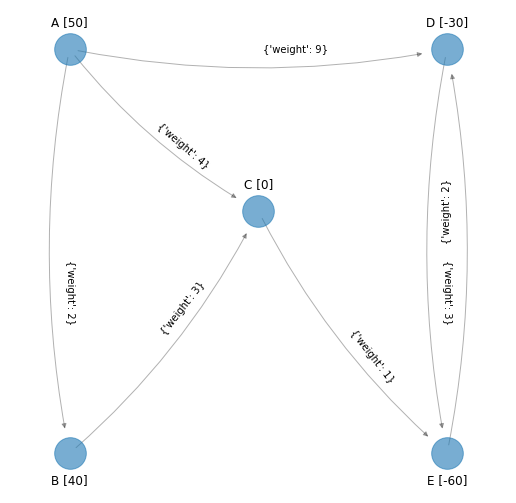

In [2]:
nodes_pos = [[0.18181818181818182, 0.7272727272727273],
             [0.18181818181818182, 0.2727272727272727],
             [0.5454545454545454, 0.2727272727272727],
             [0.5454545454545454, 0.7272727272727273],
             [0.36363636363636365, 0.5454545454545454]]

nodes = ['A', 'B', 'E', 'D', 'C']

nodes_and_pos = dict(zip(nodes, nodes_pos))

G_min_cost_flow = nx.DiGraph()

G_min_cost_flow.add_node('A', demand = 50, node_and_demand="A [50]")
G_min_cost_flow.add_node('B', demand = 40, node_and_demand="B [40]")
G_min_cost_flow.add_node('C', demand = 0, node_and_demand="C [0]")
G_min_cost_flow.add_node('D', demand = -30, node_and_demand="D [-30]")
G_min_cost_flow.add_node('E', demand = -60, node_and_demand="E [-60]")

edge_labels_min_cost_flow = {('A', 'B'): {"weight": 2},
                             ('A', 'C'): {"weight": 4},
                             ('A', 'D'): {"weight": 9},
                             ('B', 'C'): {"weight": 3},
                             ('C', 'E'): {"weight": 1},
                             ('E', 'D'): {"weight": 2},
                             ('D', 'E'): {"weight": 3}
                            }


G_min_cost_flow.add_edges_from(edge_labels_min_cost_flow)
for e in G_min_cost_flow.edges():
        G_min_cost_flow[e[0]][e[1]]["weight"] = edge_labels_min_cost_flow[e]["weight"]
        
plt.figure(figsize=(9, 9))
nx.draw_networkx_edges(G_min_cost_flow, pos=nodes_and_pos, 
                       alpha=0.3,
                       min_target_margin=25, connectionstyle="arc3, rad = 0.1")
nx.draw_networkx_edge_labels(G_min_cost_flow, pos=nodes_and_pos, 
                             edge_labels=edge_labels_min_cost_flow, label_pos=0.4,
                             font_size=10)
nodes_pos_modified = {}

y_off = 0.03

nodes_and_pos_modified = nodes_and_pos.copy()

for node in G_min_cost_flow.nodes():
    if node == 'B' or node == 'E':
        nodes_and_pos_modified[node] =  [nodes_and_pos_modified[node][0], 
                                         nodes_and_pos_modified[node][1] - y_off]
    else:
        nodes_and_pos_modified[node] =  [nodes_and_pos_modified[node][0], 
                                         nodes_and_pos_modified[node][1] + y_off]
        
    
labels = nx.get_node_attributes(G_min_cost_flow, "node_and_demand")

nx.draw_networkx_labels(G_min_cost_flow, pos=nodes_and_pos_modified, 
                        labels=labels)
nx.draw_networkx_nodes(G_min_cost_flow, pos=nodes_and_pos, 
                       node_size=1000, alpha=0.6)
plt.axis("off")
plt.show()        

En la red anterior el arco $(D, E)$ tiene costo igual a $3$ y el arco $(E, D)$ tiene costo igual a $2$.

```{margin}

Obsérvese que es ligeramente distinta la nomenclatura de este problema en cuanto a los términos de flujo neto y demanda que tiene un nodo de acuerdo a lo que se describió en el {ref}`ejemplo de flujo de costo mínimo <EJREDFLUJOCOSTOMIN>`

```

Al lado de cada nodo en corchetes se presenta el flujo neto generado por el nodo. Los nodos origen tienen un flujo neto positivo y en la red son los nodos "A" y "B" (por ejemplo fábricas). Los nodos destino tienen un flujo neto negativo que en la red son los nodos "D" y "E" (por ejemplo clientes). El único nodo de transbordo es el nodo "C" que tiene flujo neto igual a cero (centro de distribución por ejemplo). Los valores de los costos se muestran en los arcos. Es una red sin capacidades.

Entonces el modelo de PL que minimiza el costo de transferencia de flujo de modo que el **flujo neto** satisfaga lo representado en la red, considerando el flujo neto como el flujo total que sale del nodo menos el flujo total que entra al nodo es:

$$\displaystyle \min 2 x_{AB} + 4 x_{AC} + 9 x_{AD} + 3 x_{BC} + x_{CE} + 3 x_{DE} + 2x_{ED}$$

$$\text{sujeto a: }$$

$$
\begin{eqnarray}
&x_{AB}&  + &x_{AC}& + &x_{AD}&   &&         &&         &&         &&       &=& 50 \nonumber \\
&-x_{AB}&   &&         &&       + &x_{BC}&   &&         &&         &&       &=& 40 \nonumber \\
&&        - &x_{AC}&   &&       - &x_{BC}& + &x_{CE}&   &&         &&       &=& 0 \nonumber \\
&&          &&       - &x_{AD}&   &&         &&       + &x_{DE}& - &x_{ED}& &=& -30 \nonumber \\
&&          &&         &&         &&       - &x_{CE}& - &x_{DE}& + &x_{ED}& &=& -60 \nonumber
\end{eqnarray}
$$

$$x_{ij} \geq 0 \forall i,j$$

La primer restricción de igualdad representa el flujo neto para el nodo $A$ y la última el flujo neto para el nodo $E$.

```{admonition} Observación
:class: tip

Obsérvese que la matriz que representa a las restricciones de igualdad es la matriz de incidencia nodo-arco.

```

```{margin}

Multiplicamos por $-1$ pues el resultado de la función `incidence_matrix` está volteado respecto a la definición de la matriz de incidencia nodo-arco. 
```

In [3]:
print(-1*nx.incidence_matrix(G_min_cost_flow, oriented=True).todense())

[[ 1.  1.  1.  0.  0.  0.  0.]
 [-1.  0.  0.  1.  0.  0.  0.]
 [ 0. -1.  0. -1.  1.  0.  0.]
 [ 0.  0. -1.  0.  0.  1. -1.]
 [ 0.  0.  0.  0. -1. -1.  1.]]


El problema anterior lo podemos resolver directamente con [scipy-optimize-linprog](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html#scipy-optimize-linprog):

In [4]:
from scipy.optimize import linprog
import numpy as np

In [5]:
c = np.array([2, 4, 9, 3, 1, 3, 2])

A_eq = -1*nx.incidence_matrix(G_min_cost_flow, oriented=True).todense()

In [6]:
print(A_eq)

[[ 1.  1.  1.  0.  0.  0.  0.]
 [-1.  0.  0.  1.  0.  0.  0.]
 [ 0. -1.  0. -1.  1.  0.  0.]
 [ 0.  0. -1.  0.  0.  1. -1.]
 [ 0.  0.  0.  0. -1. -1.  1.]]


In [7]:
b = list(nx.get_node_attributes(G_min_cost_flow, 
                             "demand").values())

```{margin}

Cada tupla hace referencia a las cotas inferiores y superiores que tiene cada variable.

```

In [8]:
bounds = [(0, None), (0,None), (0,None), (0,None), (0,None), (0, None), (0, None)]

In [9]:
print(linprog(c=c, A_eq=A_eq, b_eq=b,bounds=bounds))

     con: array([ 1.23415534e-06,  1.05034484e-06,  2.62587889e-08, -7.61500058e-07,
       -1.54925893e-06])
     fun: 469.9999898969424
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([3.62017054e-07, 4.99999977e+01, 7.19274437e-07, 3.99999993e+01,
       8.99999970e+01, 3.55827520e-09, 2.99999985e+01])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  """Entry point for launching an IPython kernel.


También con `cvxpy` podemos resolver el PL anterior:

```{margin}

Ver [cvxpy: linear_program](https://www.cvxpy.org/examples/basic/linear_program.html)

```

In [10]:
import cvxpy as cp

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

In [11]:
n = 7 #number of variables
x = cp.Variable(n)
fo_cvxpy = c.T@x #objective function

constraints = [A_eq@x == b,
               x >=0
               ]

In [12]:
opt_objective = cp.Minimize(fo_cvxpy)

In [13]:
prob = cp.Problem(opt_objective, constraints)
print(prob.solve())

470.000000290646


In [14]:
# Print result.
print("\nThe optimal value is", prob.value)
print("A solution x is")
print(x.value)


The optimal value is 470.000000290646
A solution x is
[1.65932275e-07 4.99999998e+01 3.63353936e-09 4.00000002e+01
 9.00000000e+01 2.34894911e-08 3.00000000e+01]


## Modelo de PL

Algunas características generales de los problemas de PL se presentan a continuación

### Terminología en PL

|Ejemplo anterior | Problema general|
|:---:|:---:|
|Capacidad  producción de las plantas | Recursos|
|3 plantas | m recursos |
|Fabricación de productos | Actividades |
|2 productos | n actividades|
|Tasa de producción del producto | Nivel de la actividad|
|Ganancia | Medida global de desempeño|

Y en la terminología del problema general se desea determinar la asignación de recursos a ciertas actividades. Lo anterior implica elegir los niveles de las actividades (puntos óptimos) que lograrán el mejor valor posible (valor óptimo) de la medida global de desempeño.

En el PL:

$f_o$: valor de la medida global de desempeño (función objetivo).

$x_j$: nivel de la actividad $j$ con $j=1, 2, \dots, n$. También se les conoce con el nombre de variables de decisión (variables de optimización).

$c_j$: incremento en $f_o$ que se obtiene al aumentar una unidad en el nivel de la actividad j.

$b_i$: cantidad de recurso $i$ disponible para asignarse a las actividades con $i=1, 2, \dots, m$.

$a_{ij}$: cantidad del recurso $i$ consumido por cada unidad de la actividad $j$.

```{admonition} Observación
:class: tip

Los valores de $c_j, b_i, a_{ij}$ son las constantes o parámetros del modelo.

```

### Formas de un PL

Es posible que se encuentren con PL en diferentes formas por ejemplo:

1.Minimizar en lugar de maximizar la función objetivo.

2.Restricciones con desigualdad en sentido mayor, menor o igual que.

3.Restricciones en forma de igualdad.

4.Variables de decisión sin la restricción de no negatividad (variables libres).

Pero siempre que se cumpla con que la función objetivo y las restricciones son funciones lineales entonces tal problema se clasifica como un PL.

## Ejemplo: método gráfico

Supóngase que una compañía tiene tres plantas en las que se producen dos productos. La compañía nos entrega los siguientes datos relacionados con:

1. Número de horas de producción disponibles por semana en cada planta para fabricar estos productos.

2. Número de horas de fabricación para producir cada lote de los productos.

3. La ganancia por lote de cada producto.

Lo anterior se resume en la siguiente tabla:

| |Tiempo de producción por lote en horas |||
|:---:|:---:|:---:|:---:|
| Planta |Producto 1|Producto 2| Tiempo de producción disponible a la semana en horas|
|1|1|0|4|
|2|0|2|12|
|3|3|2|18|
|Ganancia por lote| 3000| 5000||

La tabla anterior indica por ejemplo en su primer renglón que cada lote del producto 1 que se produce por semana emplea una hora de producción en la planta 1 y sólo se dispone de 4 horas semanales. Como se lee en la tabla, cada producto se fabrica en lotes de modo que la tasa de producción está definida como el número de lotes que se producen a la semana. 

Se permite cualquier combinación de tasas de producción que satisfaga estas restricciones, incluso no fabricar uno de los productos y elaborar todo lo que sea posible del otro. 
 
Se desea determinar cuáles tasas de producción (no negativas) deben tener los dos productos con el fin de maximizar las utilidades totales sujetas a las restricciones impuestas por las capacidades de producción limitadas disponibles en las tres plantas.

Se modela el problema anterior como un PL con las siguientes variables:

$x_1$: número de lotes del producto 1 que se fabrican por semana.

$x_2$: número de lotes del producto 2 que se fabrican por semana.

$f_o(x_1, x_2)$: ganancia semanal total (en miles de pesos) que generan estos dos productos.

El objetivo es elegir los valores de $x_1, x_2$ que maximicen $f_o$ sujeta a las restricciones impuestas sobre sus valores por las capacidades de producción limitadas de las cuales se disponen en las tres plantas. Esto es, resolver el PL siguiente:

$$\displaystyle \max 3x_1 + 5x_2$$

$$\text{sujeto a: }$$

$$x_1 \leq 4$$

$$2x_2 \leq 12$$

$$3x_1 + 2x_2 \leq 18$$

$$x_1 \geq 0, x_2 \geq 0$$

A continuación se muestra un procedimiento gráfico para resolver el PL anterior. Esto es posible realizar pues tenemos sólo dos variables. Se tomará $x_1$ como el eje horizontal y $x_2$ el eje vertical. Entonces se tiene la siguiente región definida por las desigualdades del PL:

In [15]:
import numpy as np
import matplotlib.pyplot as plt

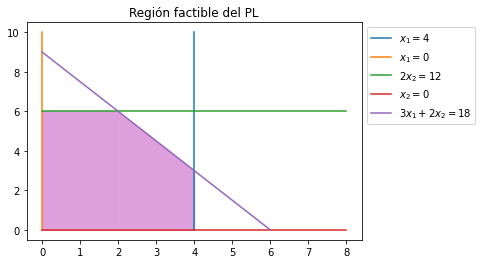

In [16]:
#x_1 ≤ 4

point1_x_1 = (4,0)

point2_x_1 = (4, 10)

point1_point2_x_1 = np.row_stack((point1_x_1, point2_x_1))

#x_1 ≥ 0
point3_x_1 = (0,0)

point4_x_1 = (0, 10)

point3_point4_x_1 = np.row_stack((point3_x_1, point4_x_1))

#2x_2 ≤ 12 or x_2 ≤ 6

point1_x_2 = (0, 6)

point2_x_2 = (8, 6)

point1_point2_x_2 = np.row_stack((point1_x_2, point2_x_2))

#x_2 ≥ 0

point3_x_2 = (0, 0)

point4_x_2 = (8, 0)

point3_point4_x_2 = np.row_stack((point3_x_2, point4_x_2))

#3x_1 + 2x_2 ≤ 18

x_1_region_1 = np.linspace(0,4, 100)

x_2_region_1 = 1/2*(18 - 3*x_1_region_1)


x_1 = np.linspace(0,6, 100)

x_2 = 1/2*(18 - 3*x_1)

plt.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1],
         point3_point4_x_1[:,0], point3_point4_x_1[:,1],
         point1_point2_x_2[:,0], point1_point2_x_2[:,1],
         point3_point4_x_2[:,0], point3_point4_x_2[:,1],
         x_1, x_2)

plt.legend(["$x_1 = 4$", "$x_1 = 0$", 
            "$2x_2 = 12$", "$x_2 = 0$",
            "$3x_1+2x_2 = 18$"], bbox_to_anchor=(1, 1))

plt.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum")
x_1_region_2 = np.linspace(0,2, 100)
plt.fill_between(x_1_region_2, 0, 6, color="plum")
plt.title("Región factible del PL")
plt.show()


La región sombreada es la región factible. Cualquier punto que se elija en la región factible satisface las desigualdades definidas en el PL. Ahora tenemos que seleccionar dentro de la región factible el punto que maximiza el valor de la función objetivo $f_o$.

El procedimiento gráfico consiste en dar a $f_o$ algún valor arbitrario, dibujar la recta definida por tal valor  y "mover tal recta de forma paralela" en la dirección que $f_o$ crece (si se desea maximizar y en la dirección en la que $f_o$ decrece si se desea minimizar) hasta que se mantenga en la región factible.

Para la función objetivo del PL anterior queda como sigue:

$$y = f(x) = 3x_1 + 5x_2$$

y vamos dando valores arbitrarios a $y$:

```{margin}

Todas las rectas tienen la misma pendiente por lo que son paralelas. Cada una de las rectas son las curvas de nivel de $f_o$

```

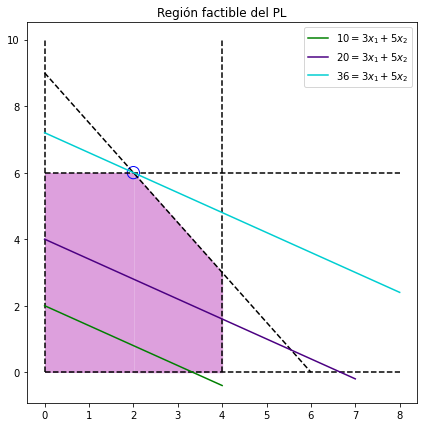

In [17]:
plt.figure(figsize=(7,7))
plt.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1], "--", color="black", label = "_nolegend_")
plt.plot(point3_point4_x_1[:,0], point3_point4_x_1[:,1], "--", color="black", label = "_nolegend_")
plt.plot(point1_point2_x_2[:,0], point1_point2_x_2[:,1], "--", color="black", label = "_nolegend_")
plt.plot(point3_point4_x_2[:,0], point3_point4_x_2[:,1], "--", color="black", label = "_nolegend_")
plt.plot(x_1, x_2, "--", color="black", label="_nolegend_")

plt.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum")
plt.fill_between(x_1_region_2, 0, 6, color="plum")
plt.title("Región factible del PL")

x_1_line_1 = np.linspace(0, 4, 100)

x_2_line_1 = 1/5*(-3*x_1_line_1 + 10)

x_1_line_2 = np.linspace(0, 7, 100)

x_2_line_2 = 1/5*(-3*x_1_line_2 + 20)

x_1_line_3 = np.linspace(0, 8, 100)

x_2_line_3 = 1/5*(-3*x_1_line_3 + 36)

plt.plot(x_1_line_1, x_2_line_1, "green",
         x_1_line_2, x_2_line_2, "indigo",
         x_1_line_3, x_2_line_3, "darkturquoise"
         )


plt.legend(["$10 = 3x_1 + 5x_2$",
            "$20 = 3x_1 + 5x_2$",
            "$36 = 3x_1 + 5x_2$"], bbox_to_anchor=(1, 1))

plt.scatter(2, 6, marker='o', s=150,
            facecolors='none', edgecolors='b')


plt.show()


Si realizamos este proceso para valores de $y$ iguales a $36, 20, 10$ observamos que la recta que da el mayor valor de la $f_o$ y que se mantiene en la región factible es aquella con valor $y_1= f(x) = 36$. Corresponde a la pareja $(x_1, x_2) = (2, 6)$ y es la **solución óptima**. Entonces produciendo los productos $1$ y $2$ a una tasa de $2$ y $6$ lotes por semana se maximiza la ganancia siendo de 36 mil pesos. No existen otras tasas de producción que sean tan redituables como la anterior de acuerdo con el modelo.

```{admonition} Comentarios

* El método gráfico anterior sólo funciona para dos o tres dimensiones.

* El gradiente de la función objetivo nos indica la dirección de máximo crecimiento de $f_o$. En el ejemplo anterior $\nabla f_o(x) = \left [ \begin{array}{c} 3 \\ 5 \end{array} \right ]$ y tal vector apunta hacia la derecha y hacia arriba. Entonces en esa dirección es hacia donde desplazamos las rectas paralelas.

* La región factible que resultó en el ejemplo anterior se le conoce con el nombre de poliedro y es un conjunto convexo (en dos dimensiones se le nombra polígono). Es una intersección finita entre hiperplanos y semi espacios, también puede pensarse como el conjunto solución de un número finito de ecuaciones y desigualdades lineales.

```


```{admonition} Observación
:class: tip


Si se utiliza un PL con otras formas diferentes a la del ejemplo (por ejemplo variables libres en lugar de no negativas) es posible que la interpretación de "asignación de recursos limitados entre actividades que compiten" puede ya no aplicarse muy bien; pero sin importar cuál sea la interpretación o el contexto, lo único necesario es que la formulación matemática del problema se ajuste a las formas permitidas.

```

```{admonition} Ejercicio
:class: tip

Resuelve con el método gráfico el siguiente PL:

$$\displaystyle \max 2x_1 + x_2$$

$$\text{sujeto a: }$$

$$x_2 \leq 10$$

$$2x_1 + 5x_2 \leq 60$$

$$x_1 + x_2 \leq 18$$

$$3x_1 + x_2 \leq 44$$

$$x_1 \geq 0, x_2 \geq 0$$

Marca al gradiente de la función objetivo en la gráfica.
```

## Tipo de soluciones en un PL

Los puntos factibles que resultan de la intersección entre las rectas del ejemplo anterior que corresponden a las desigualdades se les nombra **soluciones factibles en un vértice (FEV)** (se encuentran en una esquina). Las soluciones FEV **no** son una combinación convexa estricta entre puntos distintos del poliedro (no caen en algún segmento de línea formado por dos puntos distintos).

```{admonition} Observación
:class: tip

También a las soluciones FEV se les conoce como **puntos extremos** pero resulta más sencillo recordar FEV.

```

El método gráfico en la región anterior ilustra una **propiedad importante** de los PL con soluciones factibles y una región acotada: siempre tiene soluciones FEV y al menos una solución óptima, aún más, la mejor solución en un FEV debe ser una solución óptima.

###  ¿A qué le llamamos solución en un PL?

Cualquier conjunto de valores de las variables de decisión ($x_1, x_2, \dots, x_n$) se le nombra una solución y se identifican dos tipos:

* Una solución factible es aquella para la cual todas las restricciones se satisfacen.

* Una solución no factible es aquella para la cual al menos una restricción no se satisface.

En el ejemplo los puntos $(2,3)$ y $(4,1)$ son soluciones factibles y $(-1, 3), (4,4)$ son soluciones no factibles.

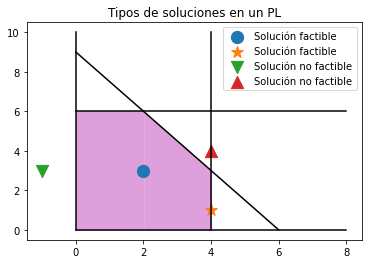

In [18]:
plt.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1], "black", label = "_nolegend_")
plt.plot(point3_point4_x_1[:,0], point3_point4_x_1[:,1], "black", label = "_nolegend_")
plt.plot(point1_point2_x_2[:,0], point1_point2_x_2[:,1], "black", label = "_nolegend_")
plt.plot(point3_point4_x_2[:,0], point3_point4_x_2[:,1], "black", label = "_nolegend_")
plt.plot(x_1, x_2, "black", label = "_nolegend_")


plt.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum", label = "_nolegend_")
plt.fill_between(x_1_region_2, 0, 6, color="plum", label = "_nolegend_")

plt.scatter(2, 3, marker='o', s=150)
plt.scatter(4, 1, marker='*', s=150)
plt.scatter(-1, 3, marker='v', s=150)
plt.scatter(4, 4, marker='^', s=150)

plt.legend(["Solución factible", "Solución factible",
            "Solución no factible", "Solución no factible"])

plt.title("Tipos de soluciones en un PL")
plt.show()

```{margin}

"Valor más favorable de la función objetivo" depende si se tiene un problema de maximización o minimización.

```

De las soluciones factibles se busca aquella solución óptima (puede haber más de una) que nos dé el valor "más favorable" (valor óptimo) de la función objetivo.

### Ejemplo: más de una solución óptima

Es posible tener más de una solución óptima, por ejemplo si la función objetivo hubiera sido $f_o(x) = 3x_1 + 2x_2$ entonces:

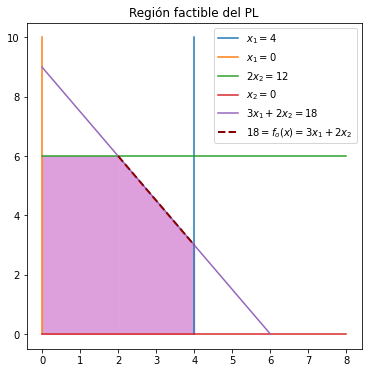

In [19]:
plt.figure(figsize=(6,6))
point4 = (2, 6)
point5 = (4, 3)

point4_point5 = np.row_stack((point4, point5))

plt.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1],
         point3_point4_x_1[:,0], point3_point4_x_1[:,1],
         point1_point2_x_2[:,0], point1_point2_x_2[:,1],
         point3_point4_x_2[:,0], point3_point4_x_2[:,1],
         x_1, x_2)

plt.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum")
plt.fill_between(x_1_region_2, 0, 6, color="plum")

plt.plot(point4_point5[:,0], point4_point5[:,1], 
         linewidth=2, color = "darkred", linestyle='dashed')

plt.legend(["$x_1 = 4$", "$x_1 = 0$", 
            "$2x_2 = 12$", "$x_2 = 0$",
            "$3x_1+2x_2 = 18$",
            "$18 = f_o(x) = 3x_1 + 2x_2$"], bbox_to_anchor=(1, 1))
plt.title("Región factible del PL")
plt.show()

El segmento de recta que va de $(2,6)$ a $(4,3)$ (en línea punteada) son soluciones óptimas. Tal segmento es la curva de nivel de $f_o(x)$ con el valor $18$. Cualquier PL que tenga soluciones óptimas múltiples tendrá un número infinito de ellas, todas con el mismo valor óptimo.

```{admonition} Comentario

Si un PL tiene exactamente una solución óptima, ésta debe ser una solución FEV. Si tiene múltiples soluciones óptimas, al menos dos deben ser soluciones FEV. Por esto para resolver problemas de PL sólo tenemos que considerar un número finito de soluciones.


```

### Ejemplo: PL's sin solución

Es posible que el PL no tenga soluciones óptimas lo cual ocurre sólo si:

1.No tiene soluciones factibles y se le nombra PL **no factible**.

2.Las restricciones no impiden que el valor de la función objetivo mejore indefinidamente en la dirección favorable. En este caso se tiene un PL con función objetivo no acotada y se le nombra PL **no acotado**.


Un ejemplo de un PL no factible pues su región factible es vacía se obtiene al añadir la restricción $3x_1+ 5x_2 \geq 50$ a las restricciones anteriores:

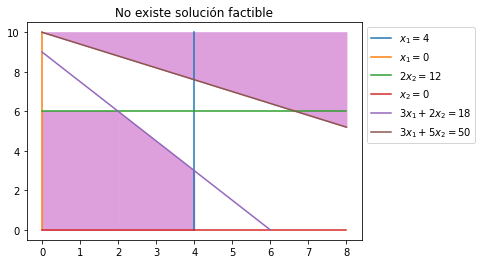

In [20]:
#3x_1 + 5x_2 ≥ 50

x_1_b = np.linspace(0,8, 100)

x_2_b = 1/5*(50 - 3*x_1_b)

plt.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1],
         point3_point4_x_1[:,0], point3_point4_x_1[:,1],
         point1_point2_x_2[:,0], point1_point2_x_2[:,1],
         point3_point4_x_2[:,0], point3_point4_x_2[:,1],
         x_1, x_2,
         x_1_b, x_2_b)

plt.legend(["$x_1 = 4$", "$x_1 = 0$", 
            "$2x_2 = 12$", "$x_2 = 0$",
            "$3x_1+2x_2 = 18$",
            "$3x_1 + 5x_2 = 50$"], bbox_to_anchor=(1, 1))

plt.fill_between(x_1_b, x_2_b, 10, color="plum")
plt.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum")
plt.fill_between(x_1_region_2, 0, 6, color="plum")
plt.title("No existe solución factible")
plt.show()

La intersección entre las dos regiones sombreadas es vacía.

Un ejemplo de un PL no acotado resulta de sólo considerar las restricciones $x_1 \leq 4, x_1 \geq 0, x_2 \geq 0$:

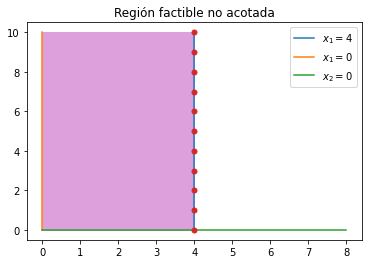

In [21]:
points = np.column_stack((4*np.ones(11), np.arange(11)))
plt.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1],
         point3_point4_x_1[:,0], point3_point4_x_1[:,1],
         point3_point4_x_2[:,0], point3_point4_x_2[:,1])

plt.plot(points[:,0], points[:,1], 'o', markersize=5)

plt.legend(["$x_1 = 4$", "$x_1 = 0$", 
            "$x_2 = 0$"], bbox_to_anchor=(1, 1))


x_1_region = np.linspace(0,4, 100)
plt.fill_between(x_1_region, 0, 10, color="plum")
plt.title("Región factible no acotada")
plt.show()


Se observa en la gráfica anterior que se tiene una región factible no acotada y como el objetivo es maximizar podemos elegir el valor $x_1 = 4$ y arbitrariamente un valor cada vez más grande de $x_2$ y obtendremos una mejor solución dentro de la región factible.

## Método símplex

Para comprender sus conceptos fundamentales se considera un PL en una forma **no estándar** y se utiliza el mismo PL del ejemplo anterior:

$$\displaystyle \max 3x_1 + 5x_2$$

$$\text{sujeto a: }$$

$$x_1 \leq 4$$

$$2x_2 \leq 12$$

$$3x_1 + 2x_2 \leq 18$$

$$x_1 \geq 0, x_2 \geq 0$$

### Soluciones FEV y NFEV

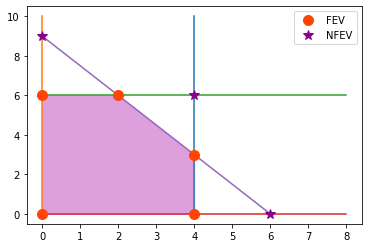

In [22]:
fig, ax = plt.subplots()

ax.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1], label = "_nolegend_")
ax.plot(point3_point4_x_1[:,0], point3_point4_x_1[:,1], label = "_nolegend_")
ax.plot(point1_point2_x_2[:,0], point1_point2_x_2[:,1], label = "_nolegend_")
ax.plot(point3_point4_x_2[:,0], point3_point4_x_2[:,1], label = "_nolegend_")
ax.plot(x_1, x_2, label = "_nolegend_")


ax.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum", label = "_nolegend_")
x_1_region_2 = np.linspace(0,2, 100)
ax.fill_between(x_1_region_2, 0, 6, color="plum", label = "_nolegend_")


point_FEV_1 = (0,0)
point_FEV_2 = (0,6)  
point_FEV_3 = (2,6) 
point_FEV_4 = (4,3) 
point_FEV_5 = (4,0)


array_FEV = np.row_stack((point_FEV_1,
                          point_FEV_2,
                          point_FEV_3,
                          point_FEV_4,
                          point_FEV_5))

point_NFEV_1 = (0, 9)
point_NFEV_2 = (4, 6)
point_NFEV_3 = (6, 0)

array_NFEV = np.row_stack((point_NFEV_1,
                           point_NFEV_2,
                           point_NFEV_3))


ax.plot(array_FEV[:,0], array_FEV[:,1], 'o', color="orangered", markersize=10, label="FEV")

ax.plot(array_NFEV[:,0], array_NFEV[:,1], '*', color="darkmagenta", markersize=10, label="NFEV")

ax.legend()

plt.show()

Los puntos en la gráfica con etiqueta "FEV" son soluciones factibles en un vértice:

* $(0, 0), (0, 6), (2, 6), (4, 3), (4, 0)$


y están definidos por las restricciones de desigualdad tomando sólo la igualdad, esto es, por las rectas: $x_1 = 4, 2x_2 = 12, 3x_1 + 2 x_2 = 18, x_1 = 0, x_2 = 0$. 

```{admonition} Definiciones

* A las rectas que se forman a partir de una desigualdad tomando únicamente la igualdad se les nombra **ecuaciones de frontera de restricción** o sólo ecuaciones de frontera.

* Las ecuaciones de frontera que definen a las FEV se les nombra **ecuaciones de definición**.

```

Análogamente los puntos con etiqueta "NFEV" son soluciones no factibles en un vértice:


* $(0, 9), (4, 6), (6,0)$

y también están definidos por las ecuaciones de frontera.

```{admonition} Observación
:class: tip

Aunque las soluciones en un vértice también pueden ser no factibles (NFEV) no es de importancia su análisis pues el método símplex no las revisa.

```

```{margin}

En más de dos dimensiones cada ecuación de definición genera un hiperplano en un espacio $n$ dimensional. Y la intersección de las $n$ ecuaciones de frontera es una solución simultánea de un sistema de $n$ ecuaciones lineales de definición.

```

```{admonition} Comentario

En general para un PL con $n$ variables de decisión se cumple que cada solución FEV se define por la intersección de $n$ ecuaciones de frontera. Podría ser que se tengan más de $n$ fronteras de restricción que pasen por el vértice pero $n$ de ellas definen a la solución FEV y éstas son las ecuaciones de definición.

```

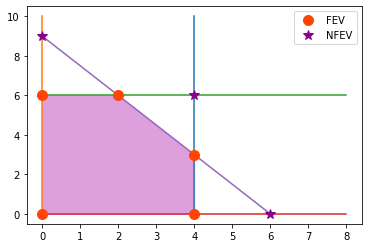

In [23]:
fig, ax = plt.subplots()

ax.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1], label = "_nolegend_")
ax.plot(point3_point4_x_1[:,0], point3_point4_x_1[:,1], label = "_nolegend_")
ax.plot(point1_point2_x_2[:,0], point1_point2_x_2[:,1], label = "_nolegend_")
ax.plot(point3_point4_x_2[:,0], point3_point4_x_2[:,1], label = "_nolegend_")
ax.plot(x_1, x_2, label = "_nolegend_")

ax.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum", label = "_nolegend_")
x_1_region_2 = np.linspace(0,2, 100)
ax.fill_between(x_1_region_2, 0, 6, color="plum", label = "_nolegend_")

ax.plot(array_FEV[:,0], array_FEV[:,1], 'o', color="orangered", markersize=10, label="FEV")

ax.plot(array_NFEV[:,0], array_NFEV[:,1], '*', color="darkmagenta", markersize=10, label="NFEV")

ax.legend()

plt.show()

|Solución FEV| Ecuaciones de definición|
|:---:|:---:|
|(0,0)| $x_1 = 0, x_2 = 0$|
|(0,6)| $x_1 = 0, 2x_2 = 12$|
|(2,6)| $2x_2 = 12, 3x_1 + 2x_2 = 18$|
|(4,3)| $3x_1 + 2x_2 = 18, x_1 = 4$|
|(4,0)| $x_1 = 4, x_2 = 0$|

### FEV adyacentes

```{admonition} Definición

En un PL con $n$ variables de decisión nombramos soluciones FEV adyacentes a dos soluciones FEV que comparten $n-1$ fronteras de restricción. Las soluciones FEV adyacentes están conectadas por una arista (segmento de recta)
```

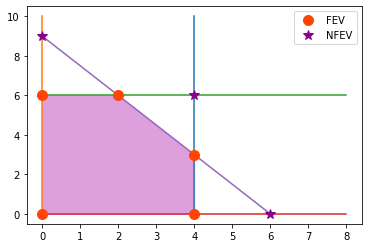

In [24]:
fig, ax = plt.subplots()

ax.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1], label = "_nolegend_")
ax.plot(point3_point4_x_1[:,0], point3_point4_x_1[:,1], label = "_nolegend_")
ax.plot(point1_point2_x_2[:,0], point1_point2_x_2[:,1], label = "_nolegend_")
ax.plot(point3_point4_x_2[:,0], point3_point4_x_2[:,1], label = "_nolegend_")
ax.plot(x_1, x_2, label = "_nolegend_")

ax.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum", label = "_nolegend_")
x_1_region_2 = np.linspace(0,2, 100)
ax.fill_between(x_1_region_2, 0, 6, color="plum", label = "_nolegend_")

ax.plot(array_FEV[:,0], array_FEV[:,1], 'o', color="orangered", markersize=10, label="FEV")

ax.plot(array_NFEV[:,0], array_NFEV[:,1], '*', color="darkmagenta", markersize=10, label="NFEV")

ax.legend()

plt.show()

En el ejemplo $(0,0)$ y $(0,6)$ son adyacentes pues comparten una arista formada por la ecuación de frontera $x_1=0$ y de cada solución FEV salen dos aristas, esto es tienen dos soluciones FEV adyacentes.

```{admonition} Comentario

Una razón para analizar las soluciones FEV adyacentes es la siguiente **propiedad**: 

si un PL tiene al menos una solución óptima y una solución FEV no tiene soluciones FEV adyacentes que sean mejores entonces ésa debe ser una solución óptima.

```

```{admonition} Observación
:class: tip

En el ejemplo $(2, 6)$ es un punto óptimo pues sus soluciones FEV adyacentes, $(0, 6)$, $(4,3)$ tienen un valor de la función objetivo menor (recuérdese es un problema de maximización).

```

### Pasos que sigue el método símplex

Para el ejemplo anterior el método símplex a grandes rasgos realiza lo siguiente:

**Paso inicial:** se elige $(0,0)$ como la solución FEV inicial para examinarla (esto siempre se puede hacer para problemas con restricciones de no negatividad).

```{margin}

En el ejemplo numérico se entenderá la frase "solución FEV adyacente que es mejor"

```

**Prueba de optimalidad:** revisar condición de optimalidad para $(0,0)$. Concluir que $(0,0)$ no es una solución óptima (existe una solución FEV adyacente que es mejor).

**Iteración 1:** moverse a una solución FEV adyacente mejor, para esto se realizan los pasos:

1.Entre las dos aristas de la región factible que salen de $(0,0)$ se elige desplazarse **a lo largo** de la arista que aumenta el valor de $x_2$ (con una función objetivo $f_o(x) = 3x_1 + 5x_2$ si $x_2$ aumenta entonces el valor de $f_o$ crece más que con $x_1$).

2.Detenerse al llegar a la primera ecuación de frontera en esa dirección: $2x_2 = 12$ para **mantener factibilidad**.

3.Obtener la intersección del nuevo conjunto de ecuaciones de frontera: $(0,6)$.

```{margin}

En el ejemplo numérico se entenderá la frase "solución FEV adyacente que es mejor"

```

**Prueba de optimalidad**: revisar condición de optimalidad para $(0,6)$. Concluir que $(0,6)$ no es una solución óptima (existe una solución FEV adyacente que es mejor).

**Iteración 2:** moverse a una solución FEV adyacente mejor:

1.De las dos aristas que salen de $(0,6)$ moverse a lo largo de la arista que aumenta el valor de $x_1$ (para que la $f_o$ continue mejorando no podemos ir hacia abajo pues esto implicaría disminuir el valor de $x_2$ y por tanto $f_o$).

2.Detenerse al llegar a la primera ecuación de frontera en esa dirección: $3x_1+2x_2 = 12$ para manterner factibilidad.

3.Obtener la intersección del nuevo conjunto de ecuaciones de frontera: $(2,6)$.

```{margin}

En el ejemplo numérico se entenderá la frase "ninguna solución FEV adyacente es mejor"
```

**Prueba de optimalidad:** revisar condición de optimalidad para $(2,6)$. Concluir que $(2,6)$ es una solución óptima (ninguna solución FEV adyacente es mejor).

### Forma aumentada de un PL

El método símplex inicia con un **sistema de ecuaciones lineales** con lado derecho igual a $b$ (que es el lado derecho de las restricciones funcionales) y una matriz del sistema con menos renglones que columnas ($m < n$). **Asume** que las entradas de $b$ son no negativas y que el *rank* de $A$ es $m$ (esto es, de *rank* completo).

Para revisar los pasos del método símplex descritos anteriormente en esta sección continuaremos con el ejemplo anterior de PL:

$$\displaystyle \max 3x_1 + 5x_2$$

$$\text{sujeto a: }$$

$$x_1 \leq 4$$

$$2x_2 \leq 12$$

$$3x_1 + 2x_2 \leq 18$$

$$x_1 \geq 0, x_2 \geq 0$$

Y vamos a nombrar a las desigualdades $x_1 \leq4, 2x_2 \leq 12, 3x_1 + 2x_12 \leq 18$ **restricciones funcionales** y a las desigualdades $x_1 \geq 0, x_2 \geq 0$ **restricciones de no negatividad**.

```{admonition} Observación
:class: tip

Aunque hay diversas formas de PL en las que podríamos tener lados derechos negativos o desigualdades del tipo $\geq$, es sencillo transformar de forma algebraica tales PL a una forma similar descrita en esta sección. 

```

En el ejemplo tenemos desigualdades por lo que se introducen **variables de holgura, *aka slack variables*,** no negativas para obtener la forma aumentada:

$$\displaystyle \max 3x_1 + 5x_2$$

$$\text{sujeto a: }$$

$$x_1 + x_3 = 4$$

$$2x_2 + x_4 = 12$$

$$3x_1 + 2x_2 + x_5 = 18$$

$$x_1 \geq 0, x_2 \geq 0, x_3 \geq 0, x_4 \geq 0, x_5 \geq 0$$

A esta forma se le nombra **forma aumentada** del PL.

Y en notación matricial el sistema de ecuaciones lineales es:

$$
Ax = 
\left [
\begin{array}{ccccc}
1 & 0 & 1 & 0 & 0 \\
0 & 2 & 0 & 1 & 0 \\
3 & 2 & 0 & 0 & 1 \\
\end{array}
\right ]
\left [
\begin{array}{c}
x_1 \\
x_2 \\
x_3 \\
x_4 \\
x_5
\end{array}
\right ]
=
\left[
\begin{array}{c}
4 \\
12 \\
18
\end{array}
\right ]
=
b
$$

```{admonition} Observación
:class: tip

Obsérvese que en la matriz de la forma aumentada se tiene una matriz identidad.

```

```{admonition} Comentario

Interpretación de algunos valores de las variables en la forma aumentada:

Si una variable de holgura es igual a $0$ en la solución actual, entonces esta solución se encuentra sobre la ecuación de frontera de la restricción funcional correspondiente. Un valor mayor que $0$ significa que la solución está en el lado factible de la ecuación de frontera, mientras que un valor menor que $0$ señala que está en el lado no factible de esta ecuación de frontera.

```

```{admonition} Observación
:class: tip

Obsérvese que las variables de holgura al iniciar el método tienen un coeficiente de $0$ en la función objetivo $f_o(x) = 3x_1 + 5x_2 = 3x_1 + 5x_2  + 0x_3 + 0x_4 + 0x_5$

```

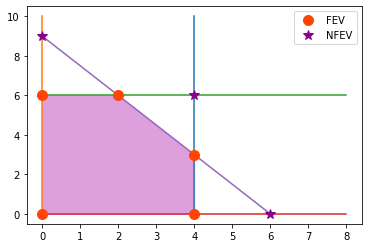

In [25]:
fig, ax = plt.subplots()

ax.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1], label = "_nolegend_")
ax.plot(point3_point4_x_1[:,0], point3_point4_x_1[:,1], label = "_nolegend_")
ax.plot(point1_point2_x_2[:,0], point1_point2_x_2[:,1], label = "_nolegend_")
ax.plot(point3_point4_x_2[:,0], point3_point4_x_2[:,1], label = "_nolegend_")
ax.plot(x_1, x_2, label = "_nolegend_")

ax.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum", label = "_nolegend_")
x_1_region_2 = np.linspace(0,2, 100)
ax.fill_between(x_1_region_2, 0, 6, color="plum", label = "_nolegend_")

ax.plot(array_FEV[:,0], array_FEV[:,1], 'o', color="orangered", markersize=10, label="FEV")

ax.plot(array_NFEV[:,0], array_NFEV[:,1], '*', color="darkmagenta", markersize=10, label="NFEV")

ax.legend()

plt.show()

```{admonition} Definiciones

Una **solución aumentada** es una solución de las variables originales que se aumentó con los valores correspondientes de las variables de holgura.

Una **solución básica** es una solución FEV o NFEV aumentada.

Una **solución básica factible (BF)** es una solución FEV aumentada.

```

```{margin}

$$
\left [
\begin{array}{ccccc}
1 & 0 & 1 & 0 & 0 \\
0 & 2 & 0 & 1 & 0 \\
3 & 2 & 0 & 0 & 1 \\
\end{array}
\right ]
\left [
\begin{array}{c}
x_1 \\
x_2 \\
x_3 \\
x_4 \\
x_5
\end{array}
\right ]
=
\left[
\begin{array}{c}
4 \\
12 \\
18
\end{array}
\right ]
$$
```

En el ejemplo:

* $\left [ \begin{array}{c} x_1 \\ x_2 \end{array} \right ] = \left [ \begin{array}{c} 3 \\ 2 \end{array} \right ]$ es solución (de hecho factible) y $\left [ \begin{array}{c} x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \end{array} \right ] = \left [ \begin{array}{c} 3 \\ 2 \\ 1 \\ 8 \\ 5 \end{array} \right ]$ es solución aumentada (factible).

* $\left [ \begin{array}{c} x_1 \\ x_2 \end{array} \right ] =  \left [ \begin{array}{c} 4 \\ 6 \end{array} \right ]$ es solución NFEV y $\left [ \begin{array}{c} x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \end{array} \right ] = \left [ \begin{array}{c} 4 \\ 6 \\ 0 \\ 0 \\ -6 \end{array} \right ]$ es solución básica.

* $\left [ \begin{array}{c} x_1 \\ x_2 \end{array} \right ] =  \left [ \begin{array}{c} 0 \\ 6 \end{array} \right ]$ es solución FEV y $\left [ \begin{array}{c} x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \end{array} \right ] = \left [ \begin{array}{c} 0 \\ 6 \\ 4 \\ 0 \\ 6 \end{array} \right ]$ es solución BF.

### Soluciones BF adyacentes

```{admonition} Definición

Dos soluciones BF son adyacentes si sus correspondientes soluciones FEV lo son. 

```

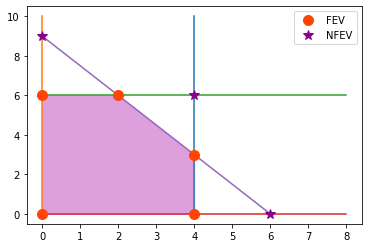

In [26]:
fig, ax = plt.subplots()

ax.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1], label = "_nolegend_")
ax.plot(point3_point4_x_1[:,0], point3_point4_x_1[:,1], label = "_nolegend_")
ax.plot(point1_point2_x_2[:,0], point1_point2_x_2[:,1], label = "_nolegend_")
ax.plot(point3_point4_x_2[:,0], point3_point4_x_2[:,1], label = "_nolegend_")
ax.plot(x_1, x_2, label = "_nolegend_")

ax.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum", label = "_nolegend_")
x_1_region_2 = np.linspace(0,2, 100)
ax.fill_between(x_1_region_2, 0, 6, color="plum", label = "_nolegend_")

ax.plot(array_FEV[:,0], array_FEV[:,1], 'o', color="orangered", markersize=10, label="FEV")

ax.plot(array_NFEV[:,0], array_NFEV[:,1], '*', color="darkmagenta", markersize=10, label="NFEV")

ax.legend()

plt.show()

```{margin}

$$
\left [
\begin{array}{ccccc}
1 & 0 & 1 & 0 & 0 \\
0 & 2 & 0 & 1 & 0 \\
3 & 2 & 0 & 0 & 1 \\
\end{array}
\right ]
\left [
\begin{array}{c}
x_1 \\
x_2 \\
x_3 \\
x_4 \\
x_5
\end{array}
\right ]
=
\left[
\begin{array}{c}
4 \\
12 \\
18
\end{array}
\right ]
$$
```

En el ejemplo $\left [ \begin{array}{c} 0 \\ 0 \\ 4 \\ 12 \\ 18 \end{array} \right ]$ y $\left [ \begin{array}{c} 0 \\ 6 \\ 4 \\ 0 \\ 6 \end{array} \right ]$ son soluciones BF adyacentes. 

### Variables básicas y no básicas

```{admonition} Definición

Dada la matriz $A \in \mathbb{R}^{m \times n}$ de la forma aumentada aquellas variables de decisión que corresponden a columnas linealmente independientes se les nombra **variables básicas**. Las restantes son **variables no básicas**.

```

Al inicio del método símplex la matriz de la forma aumentada es:

$$\left [
\begin{array}{ccccc}
1 & 0 & 1 & 0 & 0 \\
0 & 2 & 0 & 1 & 0 \\
3 & 2 & 0 & 0 & 1 \\
\end{array}
\right ]
$$

Por lo que las variables básicas son $x_3, x_4, x_5$ y las no básicas son $x_1, x_2$.

```{admonition} Definición

La matriz que se forma a partir de las columnas de $A$ que corresponden a las variables básicas se denota como $B \in \mathbb{R}^{m \times m}$ es no singular y se nombra ***basis matrix***. La matriz que se forma con las columnas de las variables no básicas se denota con $N$ y su nombre es **nonbasis matrix**.

```

```{margin}

$$
\left [
\begin{array}{ccccc}
1 & 0 & 1 & 0 & 0 \\
0 & 2 & 0 & 1 & 0 \\
3 & 2 & 0 & 0 & 1 \\
\end{array}
\right ]
\left [
\begin{array}{c}
x_1 \\
x_2 \\
x_3 \\
x_4 \\
x_5
\end{array}
\right ]
=
\left[
\begin{array}{c}
4 \\
12 \\
18
\end{array}
\right ]
$$
```

En el ejemplo la *basis matrix* y la *nonbasis matrix* al inicio del método son:

$$B
=\left [
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right ]
$$

$$N
=
\left [
\begin{array}{ccccc}
1 & 0 \\
0 & 2 \\
3 & 2 \\
\end{array}
\right ]
$$

```{admonition} Comentarios

* Obsérvese en el ejemplo que al tener 5 variables y tres ecuaciones si se le asigna un valor arbitrario a $x_1, x_2$ entonces quedan determinadas las variables $x_3, x_4, x_5$. En el método símplex las variables no básicas se igualan a $0$ por lo que se tiene: $\left [ \begin{array}{c} x_1 \\ x_2 \\ x_3 \\ x_4 \end{array} \right ] = \left [ \begin{array}{c} 0 \\ 0 \\ 4 \\ 12 \\ 18 \end{array} \right ]$

* Una forma de distinguir si dos soluciones BF son adyacentes es comparar qué variables no básicas (análogamente sus básicas) tienen. Si difieren en sólo una entonces son soluciones BF adyacentes. Por ejemplo: $\left [ \begin{array}{c} 0 \\ 0 \\ 4 \\ 12 \\ 18 \end{array} \right]$ y $\left [ \begin{array}{c} 0 \\ 6 \\ 4 \\ 0 \\ 6 \end{array} \right ]$ son BF adyacentes pues tienen como variables no básicas $x_1, x_2$ y $x_1, x_4$ respectivamente. Esto también se puede describir como: $x_2$ "pasa de ser no básica a básica" (análogamente $x_4$ pasa de básica a no básica). Lo anterior ayuda a identificar soluciones BF adyacentes en PL's con más de dos variables en los que resulta más complicado graficar.

* El método símplex al considerar variables no básicas con valor de $0$ indica que la restricción no negativa $x_j \leq 0$ es **activa** para $j$ en los índices de las variables no básicas.

* En el método símplex se puede verificar que una solución es BF si las variables básicas son no negativas (recuérdese que las no básicas en el método son igualadas a cero).

```

### Variables básicas no degeneradas y degeneradas

Denotemos a $\mathcal{B}$ como el conjunto de índices en el conjunto $\{1, 2, \dots, m+n\}$ que representan a las variables básicas y $\mathcal{N}$ al conjunto de índices de las no básicas. En el ejemplo $\mathcal{B} = \{3, 4, 5\}$, $\mathcal{N} = \{1, 2\}$ con $m+n=5$ al inicio del método símplex. El método en sus iteraciones elige algún índice de $\mathcal{N}$ y lo sustituye por un índice del conjunto $\mathcal{B}$.

```{margin}

En el ejemplo se entenderá la frase "mejoren la función objetivo $f_o$"
```

```{admonition} Comentarios

* El quitar y añadir variables a los conjuntos de índices $\mathcal{N}, \mathcal{B}$ y realizar los ajustes necesarios (recalcular valores de las variables básicas) en los valores de todas las variables básicas y no básicas se le conoce con el nombre de **pivoteo**.

* La interpretación geométrica de quitar, añadir variables de las matrices $N, B$ y realizar los ajustes necesarios (recalcular valores de las variables básicas) en una solución BF es equivalente en dos dimensiones a moverse por una arista y detenerse hasta encontrar una solución FEV.

* La elección de cuál variable no básica sustituir por una variable básica depende de la existencia de soluciones BF que mejoren la función objetivo $f_o$ y para ello se utiliza un criterio de optimalidad.

```

```{admonition} Definición

Una solución BF en la que todas sus variables básicas son no negativas se nombra no degenerada y degenerada si existe al menos una con valor igual a cero.

```

## Ejemplo del método símplex

Continuemos con el ejemplo anterior en su forma aumentada:

$$\displaystyle \max 3x_1 + 5x_2$$

$$\text{sujeto a: }$$

$$x_1 + x_3 = 4$$

$$2x_2 + x_4 = 12$$

$$3x_1 + 2x_2 + x_5 = 18$$

$$x_1 \geq 0, x_2 \geq 0, x_3 \geq 0, x_4 \geq 0, x_5 \geq 0$$

Y en notación matricial el sistema de ecuaciones lineales es:

$$
Ax = 
\left [
\begin{array}{ccccc}
1 & 0 & 1 & 0 & 0 \\
0 & 2 & 0 & 1 & 0 \\
3 & 2 & 0 & 0 & 1 \\
\end{array}
\right ]
\left [
\begin{array}{c}
x_1 \\
x_2 \\
x_3 \\
x_4 \\
x_5
\end{array}
\right ]
=
\left[
\begin{array}{c}
4 \\
12 \\
18
\end{array}
\right ]
=
b
$$

Defínanse al vector $x$ que contiene las variables "originales" y a las de holgura: $x = \left [ \begin{array}{c} x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \end{array} \right ]$ y $c = \left [ \begin{array}{c} 3 \\ 5 \\ 0 \\ 0 \\ 0 \end{array}\right]$ al vector de costos por lo que la función objetivo es: $f_o(x) = c^Tx$. También defínanse a los vectores de variables básicas y no básicas como: $x_B = [x_j]_{j \in \mathcal{B}}$, $x_N = [x_j]_{j \in \mathcal{N}}$.

Entonces el PL con esta notación que se debe resolver está en la forma estándar:

$$\displaystyle \max_{x \in \mathbb{R}^5} c^Tx$$

$$\text{sujeto a: }$$

$$Ax = b$$

$$x \geq 0$$

con $x=\left [ \begin{array}{c} x_B \\ x_N\end{array} \right ]$, $x_B \in \mathbb{R}^{3}, x_N \in \mathbb{R}^2$, $A \in \mathbb{R}^{3 \times 5}$.


### Paso inicial

```{margin}

$$\displaystyle \max 3x_1 + 5x_2$$

```

```{margin}

$$\text{sujeto a: }$$

```

```{margin}

$$x_1 + x_3 = 4$$

```

```{margin}

$$2x_2 + x_4 = 12$$

```

```{margin}

$$3x_1 + 2x_2 + x_5 = 18$$

```

```{margin}

$$x_1 \geq 0, x_2 \geq 0, x_3 \geq 0, x_4 \geq 0, x_5 \geq 0$$

```

Se tienen la siguiente situación: 

$$c^Tx= 3x_1 + 5x_2 + 0x_3 + 0x_4 + 0x_5$$


$$
A = 
\left [
\begin{array}{ccccc}
1 & 0 & 1 & 0 & 0 \\
0 & 2 & 0 & 1 & 0 \\
3 & 2 & 0 & 0 & 1 \\
\end{array}
\right ]
$$

Como $A = [ B \quad N ]$ y $Ax = b$ entonces $Ax = B x_B + N x_N = b$. 


Se designa $x_N$ como un vector de ceros:

$$x_N = \left [ \begin{array}{c} x_1 \\ x_2 \end{array} \right ] = \left [ \begin{array}{c} 0 \\ 0 \end{array} \right ]$$

Por tanto:

$$Ax = Bx_B + N x_N = B x_B = b$$

En este paso inicial $x_B = b$ pues $B$ es la identidad:

$$\therefore x_B = \left [ \begin{array}{c} x_3 \\ x_4 \\ x_5\end{array}\right ] = B^{-1}b = \left [ \begin{array}{ccc} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{array} \right ]^{-1} \left [ \begin{array}{c} 4 \\ 12 \\ 18 \end{array}\right ]=\left [ \begin{array}{c} 4 \\ 12 \\ 18 \end{array}\right ]$$

El vector de costos $c_B = \left [ \begin{array}{c} c_{B_3} \\ c_{B_4} \\ c_{B_5} \end{array} \right ] = \left [ \begin{array}{c} 0 \\ 0 \\ 0 \end{array} \right ]$ contiene los costos de las variables básicas. El vector $c_N=\left [ \begin{array}{c} c_{N_1} \\ c_{N_2} \end{array} \right ]=\left [ \begin{array}{c}3 \\ 5 \end{array} \right ]$ contiene los costos de las variables no básicas.

Las variables básicas son $x_3, x_4, x_5$ y las no básicas son $x_1, x_2$.

In [27]:
B = np.eye(3)
b = np.array([4, 12, 18])
x_B = b
A = np.array([[1, 0, 1, 0, 0],
              [0, 2, 0, 1, 0],
              [3, 2, 0, 0, 1]])
c_B = np.array([0,0,0])
c_N = np.array([3, 5])

#list of indexes of nonbasic variables correspond to x1, x2
N_list_idx = [0, 1]
#list of indexes of basic variables correspond to x3, x4, x5
B_list_idx = [2, 3, 4] 


### Prueba de optimalidad

Para revisar tanto en el paso inicial como en las iteraciones posteriores la condición de optimalidad para encontrar soluciones FEV adyacentes mejores, realicemos algunas reescrituras de la función objetivo.

1.Obsérvese que la función objetivo se puede escribir como:

```{margin}

Recuérdese que la función objetivo es $c^Tx= 3x_1 + 5x_2 + 0x_3 + 0x_4 + 0x_5$.

```

$$f_o(x) = c^Tx = [c_B \quad c_N] ^T \left [ \begin{array}{c} x_B \\ x_N\end{array} \right ] = c_B^Tx_B + c_N^T x_N = c_B^T B^{-1}b = [0 \quad 0 \quad 0]^T \left [ \begin{array}{c} 4 \\ 12 \\ 18 \end{array}\right ]=0$$

2.Obsérvese que todas las ecuaciones de frontera en su forma igualadas a cero pueden ser restadas de la función objetivo sin modificar su valor. Por ejemplo si tomamos la primer ecuación de frontera con lado derecho igual a cero: $x_1 + x_3 - 4 = 0$ entonces:

$$f_o(x) = f_o(x) - 0 =  f_o(x) -  (x_1 + x_3 - 4) = f_o(x) -x_1 -x_3 + 4$$

```{margin}

$$\displaystyle \max 3x_1 + 5x_2$$

```

```{margin}

$$\text{sujeto a: }$$

```

```{margin}

$$x_1 + x_3 = 4$$

```

```{margin}

$$2x_2 + x_4 = 12$$

```

```{margin}

$$3x_1 + 2x_2 + x_5 = 18$$

```

```{margin}

$$x_1 \geq 0, x_2 \geq 0, x_3 \geq 0, x_4 \geq 0, x_5 \geq 0$$

```

Y esto podemos hacer para todas las ecuaciones de frontera con lado derecho igual a cero:

$$
\begin{eqnarray}
f_o(x) &=& f_o(x) -  (x_1 + x_3 - 4) - (2x_2 + x_4 - 12) - (3x_1 + 2x_2 + x_5 - 18) \nonumber \\
&=& f_o(x) + (-x_1 - 2x_2 -2x_2) + (-x_3 - x_4 - x_5) + (4 + 12 + 18) \nonumber \\
&=& f_o(x) - \displaystyle \sum_{j \in \mathcal{B}} x_{B_j} - \sum_{j \in \mathcal{N}}x_{N_j} + \sum_{i = 1}^3 b(i)
\end{eqnarray}
$$

con $x_{B_j}$ $j$-ésima componente del vector $x_B$, $x_{N_j}$ $j$-ésima componente del vector $x_N$ y $b(i)$ $i$-ésima componente de $b$.

```{margin}

No es coincidencia que se elijan las cantidades $\lambda, \nu$ para representar esta igualdad, ver {ref}`la función Lagrangiana <FUNLAGRANGIANA>`.

```

En el método símplex no solamente se restan de la $f_o$ las ecuaciones de frontera con lado derecho igual a cero sino se multiplican por una cantidad $\nu_i$ y se suman a $f_o$. También si $\lambda$ es un vector tal que $\lambda ^T x = 0$ entonces:

$$f_o(x) = f_o(x) + \lambda^Tx + \sum_{i = 1}^3 \nu_i h_i(x) = f_o(x) + \displaystyle \sum_{j \in \mathcal{B}} \lambda_{B_j} x_{B_j} + \sum_{j \in \mathcal{N}}\lambda_{N_j}x_{N_j} + \sum_{i = 1}^3 \nu_i h_i(x)$$


con $\lambda_{B_j}$, $\lambda_{N_j}$ coeficientes asociados a $x_{B_j}$ y $x_{N_j}$ respectivamente y $h_i(x)$ $i$-ésima restricción de igualdad con lado derecho igual a cero.

Los coeficientes $\lambda_{B_j}, \lambda_{N_j}$ de la expresión anterior en el método de símplex se escriben como:

$$\lambda_{B_j} = c_{B_j} - \nu^Ta_j \quad j \in \mathcal{B}$$

$$\lambda_{N_j} = c_{N_j} - \nu^Ta_j \quad j \in \mathcal{N}$$

con $a_j$ $j$-ésima columna de $A \in \mathbb{R}^{3 \times 5}$ y $\nu \in \mathbb{R}^{3}$ vector con las $\nu_i$'s para $i = 1, 2, 3$.

El vector $\nu$ se obtiene resolviendo la ecuación: $\nu ^T B = c_B^T$ y por tanto $\nu = B^{-T} c_B $.

```{admonition} Comentarios

* La justificación del por qué:

1. $\lambda = c - A^T \nu$

2. $\nu = B^{-T} c_B$

se realizará más adelante, por lo pronto considérese que esto se obtiene de las {ref}`condiciones KKT de optimalidad <PRIMERAFORMULACIONCONDKKT>`.

* En el método símplex se mantiene en cada iteración $\lambda_{B_j} = 0 \forall j \in \mathcal{B}$ y se **busca** que $\lambda_{N_j} \forall j \in \mathcal{N}$ sea estrictamente positivo para problemas de minimización o estrictamente negativo para problemas de maximización.

```

```{admonition} Observación
:class: tip

Obsérvese que $f_o(x) = c_B^Tx_B + c_N^T x_N = c_B^T B^{-1}b = \nu^Tb$.

```

La prueba de optimalidad consiste en revisar los $\lambda_{N_j}$, $j \in \mathcal{N}$. Se selecciona(n) aquella(s) variable(s) no básica(s) que tenga(n) la tasa más alta de mejoramiento (esto depende si es un problema de maximización o minimización) del valor en la función objetivo.


```{margin}

$c_B = \left [ \begin{array}{c} c_{B_3} \\ c_{B_4} \\ c_{B_5} \end{array} \right ] = \left [ \begin{array}{c} 0 \\ 0 \\ 0 \end{array} \right ]$

```

El vector $\nu$ es:

$$\nu = B^{-T}c_B = \left [ \begin{array}{ccc} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{array} \right ] ^{-T} \left [ \begin{array}{c} 0 \\ 0 \\ 0 \end{array}\right ] = \left [ \begin{array}{c} 0 \\ 0 \\ 0 \end{array}\right ]$$

```{margin}

Resolviendo un sólo sistema de ecuaciones lineales nos ayuda a evitar calcular la inversa de una matriz que implica resolver un sistema de ecuaciones lineales más grande.

```

Para el cálculo de $\nu$ resolvemos el sistema de ecuaciones lineales para el vector de incógnitas $\nu$: 

$$B^T \nu = c_B$$

Como $B = \left [ \begin{array}{ccc} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{array} \right ]$ entonces directamente $\nu = c_B$. Por tanto:



In [28]:
nu = np.array([0, 0, 0])

Valor de la función objetivo en la solución BF del paso inicial:  $f_o(x) = \nu^Tb = 0$:

In [29]:
print(np.dot(nu, b))

0


```{margin}

$c_N= \left [ \begin{array}{c}3 \\ 5 \end{array} \right ]$

```

In [30]:
lambda_N_1 = c_N[0] - np.dot(nu, A[:, N_list_idx[0]])

In [31]:
lambda_N_2 = c_N[1] - np.dot(nu, A[:, N_list_idx[1]])

In [32]:
print(lambda_N_1)

3


In [33]:
print(lambda_N_2)

5


$\lambda_{N_1} = c_{N_1} - \nu^Ta_1 = 3 - [0 \quad 0 \quad 0]^T \left [ \begin{array}{c} 1 \\ 0 \\ 3 \end{array}\right ] = 3$

$\lambda_{N_2} = c_{N_2}- \nu^Ta_2 =  5 - [0 \quad 0 \quad 0]^T \left [ \begin{array}{c} 0 \\ 2 \\ 2 \end{array}\right ] = 5$

```{margin}

"tasa más alta de mejoramiento" se refiere a mejorar $f_o$ por un incremento de una unidad en la variable $x_2$.

```

```{margin}

Incrementar una variable no básica equivale geométricamente a moverse por una arista desde una solución FEV.

```

Como tenemos un problema de **maximización** la tasa más alta de mejoramiento de $f_o$ la da la variable $x_2$ por lo que es la variable no básica que sustituye a una variable básica. ¿Cuál variable básica se debe elegir?

In [34]:
#index for nonbasic variables, in this case value 1 correspond to x2

idx_x_N = 1

### Prueba del cociente mínimo

El objetivo de esta prueba es determinar qué variable(s) básica(s) llega(n) a cero cuando crece la variable entrante. Tal variable(s) básica(s) en la siguiente iteración será no básica y la que aumenta pasa de ser no básica a básica.

En el paso inicial las variables básicas son $x_3$, $x_4$ y $x_5$, por lo que hay que determinar de éstas cuál(es) es(son) la(s) que sale(n) al incrementar la variable no básica $x_2$.

Esta prueba del cociente mínimo primero se explicará de forma detallada para posteriormente representarla de forma matricial.

Las ecuaciones de $Ax = b$ son:

```{margin}

$$\displaystyle \max 3x_1 + 5x_2$$

```

```{margin}

$$\text{sujeto a: }$$

```

```{margin}

$$x_1 + x_3 = 4$$

```

```{margin}

$$2x_2 + x_4 = 12$$

```

```{margin}

$$3x_1 + 2x_2 + x_5 = 18$$

```

```{margin}

$$x_1 \geq 0, x_2 \geq 0, x_3 \geq 0, x_4 \geq 0, x_5 \geq 0$$

```

$$\begin{eqnarray}
x_1 + x_3 &=& 4 \nonumber \\
2x_2 + x_4 &=& 12 \nonumber \\
3x_1 + 2x_2 + x_5 &=& 18
\end{eqnarray}
$$

Despejamos cada variable básica de las ecuaciones anteriores:

$$\begin{eqnarray}
x_3 &=& 4 - x_1 \nonumber \\
x_4 &=& 12 - 2x_2 \nonumber \\
x_5 &=& 18 - 3x_1 - 2x_2
\end{eqnarray}
$$

Y se debe cumplir por las restricciones de no negatividad que al aumentar $x_2$:

$$\begin{eqnarray}
x_3 &=& 4 - x_1 \geq 0 \nonumber \\
x_4 &=& 12 - 2x_2 \geq 0  \nonumber \\
x_5 &=& 18 - 3x_1 - 2x_2 \geq 0
\end{eqnarray}
$$

En la primera ecuación $x_3 = 4 - x_1$ no tenemos contribución alguna de $x_2$ por lo que no la tomamos en cuenta. La segunda y tercer ecuación sí aparece $x_2$ y como $x_1$ es variable no básica con valor $0$ se debe cumplir:

$$\begin{eqnarray}
x_2 \leq \frac{12}{2} = 6  \nonumber \\
x_2 \leq \frac{18}{2} = 9
\end{eqnarray}
$$

Entonces se toma el mínimo de las cantidades anteriores y como es igual a $6$ y esa desigualdad la obtuvimos de despejar $x_4$ entonces se elige $x_4$ como variable básica que se vuelve no básica. Tomamos el mínimo pues el valor de $6$ es lo máximo que podemos incrementar $x_2$ sin que $x_4$ se haga no negativa.

### Prueba del cociente mínimo: forma general y con notación matricial y vectorial

El procedimiento de la prueba del cociente mínimo entonces consiste en: 

1.Elegir la columna de $A$ correspondiente a la variable no básica que sustituye a la variable básica, que por lo anterior es $x_2$ y corresponde a la segunda columna, $a_2$:

$$
A = 
\left [
\begin{array}{ccccc}
1 & 0 & 1 & 0 & 0 \\
0 & 2 & 0 & 1 & 0 \\
3 & 2 & 0 & 0 & 1 \\
\end{array}
\right ]
$$

2.Hacer la multiplicación $B^{-1}a_2$. 

Esto en general se realiza, en el paso inicial $B^{-1}$ es la identidad por lo que en este paso inicial no tuvo efecto hacer la multiplicación. 

3.Para las entradas **estrictamente positivas** de tal multiplicación anterior se divide el lado derecho entre tales entradas y se toma el mínimo. Como el lado derecho en cada iteración es $x_B = B^{-1}b$ entonces se dividen los valores de las variables básicas entre las entradas estrictamente positivas. Esto es, si se denota como $x_2^{+}$ al mínimo:

$$x_2^{+} = \min \{\frac{x_{B_i}}{d_i} : d_i > 0, i = 1, 2, \dots, m \}$$

con $d_i$ $i$-ésima componente del vector $d$ que es solución del sistema de ecuaciones: $Bd = a_2$ y $x_{B_i}$ $i$-ésima entrada del vector $x_B$ de la iteración actual. 

4.El índice donde ocurre el mínimo es el de la variable básica que será sustituida. 

En el ejemplo se tienen las siguientes asignaciones **en el paso inicial**:

```{margin}
$
B = 
\left [
\begin{array}{ccccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right ]
$
```

```{margin}

La segunda columna de $A$ se elige pues $x_2$ es la variable no básica a la que se le aumentará su valor y sustituirá a una variable básica.

```

Se resuelve la ecuación: $Bd = a_2$ para $d$ vector de incógnitas. 

In [35]:
d = np.linalg.solve(B, A[:,idx_x_N])

In [36]:
print(d)

[0. 2. 2.]


En esta iteración: $x_B = \left [ \begin{array}{c} x_3 \\ x_4 \\ x_5\end{array}\right ] = \left [ \begin{array}{c} 4 \\ 12 \\ 18 \end{array}\right ]$ pues $B$ es la matriz identidad por lo que $x_B = b$.

In [37]:
print(x_B)

[ 4 12 18]


```{margin}

Se hace la división únicamente entre las entradas estrictamente positivas

```

In [38]:
idx_positive = d >0

In [39]:
print(x_B[idx_positive]/d[idx_positive])

[6. 9.]


```{margin}

Hacer cero una variable básica y convertirla en no básica equivale geométricamente a detener el movimiento por una arista hasta encontrar una solución FEV.

```

Entonces el mínimo ocurre en la segunda posición de $x_B$ que corresponde a la variable básica $x_4$. Se elige $x_4$ como variable básica que se vuelve no básica. $x_4$ será sustituida por $x_2$ en la próxima iteración.

In [40]:
#index for basic variables, in this case value 1 correspond to x4

idx_x_B = 1

### Actualización del vector $x_B$

La actualización de las variables básicas después del paso inicial se realiza con la expresión computacional:

$$x_B = x_B - dx_{nb}^{+}$$

donde: $x_{nb}$ es la variable no básica que se volverá básica en la iteración actual. Después de actualizar $x_{nb}$ la variable básica $x_{b}$ pasa a estar en $x_N$ con valor de $0$.

Posterior a la actualización de $x_B$ se intercambian las columnas de $B$ correspondientes a las variables $x_{nb}$ y $x_b$.

**La justificación de la expresión anterior es la siguiente:**

Como $Ax = b$ y $Bx_B + Nx_N = b$ pero será incrementada la variable $x_{nb}$ y disminuida $x_{b}$ a cero entonces si $x^+$ denota el nuevo valor de $x$ se tiene:

$$b = Ax ^+ = Bx_B^+ + a_{nb}x_{nb}^+ = B x_B = Ax = b$$

recordando que $Nx_N = 0$ pues $x_N=0$ donde: $a_{nb}$ es la ${nb}$-ésima columna de $A$.

Por tanto:

$$Bx_B^+ = Bx_B - a_{nb}x_{nb}^+$$

Y premultiplicando por la inversa:

$$x_B^+ = x_B - B^{-1}a_{nb}x_{nb}^+ = x_B - d x_{nb}^+.$$

**La interpretación geométrica de esta actualización es:** un movimiento a lo largo de una arista del poliedro que mantiene factibilidad y mejora la función objetivo. Nos movemos a lo largo de esta arista hasta encontrar una solución FEV. En esta nueva solución FEV una nueva restricción no negativa se vuelve activa, la que corresponde a la variable $x_b$. 

Después de la actualización se remueve el índice $b$ del conjunto $\mathcal{B}$ y se sustituye por $nb$.

### Iteración 1

La matriz $B$ del paso inicial era:

$$B = \left [ \begin{array}{ccc} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{array} \right ]$$

y correspondía cada columna a las variables $x_3, x_4, x_5$ en ese orden.

Se realiza la actualización descrita para $x_B$:

$$x_B = x_B - dx_2^{+}$$

con $x_2$ es la variable no básica que se volverá básica en la iteración actual.

In [41]:
x_2_plus = np.min(x_B[idx_positive]/d[idx_positive])

In [42]:
print(x_2_plus)

6.0


In [43]:
x_B = x_B - d*x_2_plus

In [44]:
print(x_B)

[4. 0. 6.]


Aquí el valor de la variable $x_4$ se hace cero y tenemos que intercambiar tal entrada con la de $x_2^+$ para el vector $x_B$:

In [45]:
x_B[idx_x_B] = x_2_plus
print(x_B)

[4. 6. 6.]


```{margin}

Antes de hacer el intercambio de columnas: $B = \left [ \begin{array}{ccc} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{array} \right ]$ y la matriz original $A = 
\left [
\begin{array}{ccccc}
1 & 0 & 1 & 0 & 0 \\
0 & 2 & 0 & 1 & 0 \\
3 & 2 & 0 & 0 & 1 \\
\end{array}
\right ]
$

```

Como $x_4$ se intercambia por $x_2$ entonces se intercambia la columna $2$ de $A$, $a_2$, por la $2$ de $B$, $b_2$ por lo que al final de la iteración 1:

$$B = \left [ \begin{array}{ccc} 1 & 0 & 0 \\ 0 & 2 & 0 \\ 0 & 2 & 1 \end{array} \right ]$$

In [46]:
aux = B[:,idx_x_B]
B[:,idx_x_B] = A[:,idx_x_N]

$x_B =  \left [ \begin{array}{c} x_3 \\ x_2 \\ x_5 \end{array}\right ] = \left [ \begin{array}{c} 4 \\ 6 \\ 6 \end{array}\right ]$,  $x_N = \left [ \begin{array}{c} x_1 \\ x_4\end{array}\right ] = \left [ \begin{array}{c} 0 \\ 0\end{array}\right ]$.

In [47]:
aux = B_list_idx[idx_x_B]
B_list_idx[idx_x_B] = N_list_idx[idx_x_N]
N_list_idx[idx_x_N] = aux

```{admonition} Observación
:class: tip

La actualización de $x_B$ anterior se puede verificar que es equivalente a:

$$x_B = \left [ \begin{array}{c} x_3 \\ x_2 \\ x_5\end{array}\right ] = B^{-1}b = \left [ \begin{array}{ccc} 1 & 0 & 0 \\ 0 & 2 & 0 \\ 0 & 2 & 1 \end{array} \right ]^{-1} \left [ \begin{array}{c} 4 \\ 12 \\ 18 \end{array}\right ] =  \left [ \begin{array}{ccc} 1 & 0 & 0 \\ 0 & \frac{1}{2} & 0 \\ 0 & -1 & 1 \end{array} \right ]\left [ \begin{array}{c} 4 \\ 12 \\ 18 \end{array}\right ] = \left [ \begin{array}{c} 4 \\ 6 \\ 6 \end{array}\right ]  $$
```

### Prueba de optimalidad

Se recalcula el vector $\nu$ considerando que $c_B =  \left [ \begin{array}{c} c_{B_3} \\ c_{B_2} \\ c_{B_5} \end{array}\right ]$ tomando ahora $x_2$ como básica.

```{margin}

$B = \left [ \begin{array}{ccc} 1 & 0 & 0 \\ 0 & 2 & 0 \\ 0 & 2 & 1 \end{array} \right ]$

```

```{margin}

$c_B = \left [ \begin{array}{c} c_{B_3} \\ c_{B_2} \\ c_{B_5} \end{array} \right ] = \left [ \begin{array}{c} 0 \\ 5 \\ 0 \end{array} \right ]$

```

El vector $\nu$ es:

$$\nu = B^{-T}c_B = \left [ \begin{array}{ccc} 1 & 0 & 0 \\ 0 & \frac{1}{2} & 0 \\ 0 & -1 & 1 \end{array} \right ] ^T \left [ \begin{array}{c} 0 \\ 5 \\ 0 \end{array}\right ] = \left [ \begin{array}{c} 0 \\ \frac{5}{2} \\ -5 \end{array}\right ]$$

```{margin}

Resolviendo un sólo sistema de ecuaciones lineales nos ayuda a evitar calcular la inversa de una matriz que implica resolver un sistema de ecuaciones lineales más grande.

```

Para el cálculo de $\nu$ resolvemos el sistema de ecuaciones lineales para el vector de incógnitas $\nu$: 

$$B^T \nu = c_B$$

In [48]:
aux = c_B[idx_x_B]
c_B[idx_x_B] = c_N[idx_x_N]
c_N[idx_x_N] = aux

In [49]:
nu = np.linalg.solve(B.T, c_B)

In [50]:
print(nu)

[0.  2.5 0. ]


Por tanto:

```{margin}

$c_N= \left [ \begin{array}{c}3 \\ 0 \end{array} \right ]$
```

In [51]:
lambda_N_1 = c_N[0] - np.dot(nu, A[:,N_list_idx[0]])

In [52]:
lambda_N_4 = c_N[1] - np.dot(nu, A[:,N_list_idx[1]])

In [53]:
print(lambda_N_1)

3.0


In [54]:
print(lambda_N_4)

-2.5


$\lambda_{N_1} = c_{N_1} - \nu^Ta_1 = 3 - [0 \quad \frac{5}{2} \quad 0]^T \left [ \begin{array}{c} 1 \\ 0 \\ 3 \end{array}\right ] = 3$

$\lambda_{N_4} = c_{N_4} - \nu^Ta_4 = 0 - [0 \quad \frac{5}{2} \quad 0]^T\left [ \begin{array}{c} 0 \\ 1 \\ 0 \end{array}\right ] = -2.5$

Como tenemos un problema de maximización la tasa más alta de mejoramiento de $f_o$ la da la variable $x_1$ por lo que es la variable no básica que sustituye a una variable básica.

In [55]:
#index for nonbasic variables, in this case value 0 correspond to x1

idx_x_N = 0

Valor de la función objetivo en la solución BF actual: $f_o(x) = \nu^Tb = 30$

In [56]:
print(np.dot(nu, b))

30.0


### Prueba del cociente mínimo

```{margin}

$B = \left [ \begin{array}{ccc} 1 & 0 & 0 \\ 0 & 2 & 0 \\ 0 & 2 & 1 \end{array} \right ]$

```

```{margin}

La primer columna de $A$ se elige pues $x_1$ es la variable no básica a la que se le aumentará su valor y sustituirá a una variable básica.

```

Se resuelve la ecuación: $Bd = a_1$ para $d$ vector de incógnitas. 

In [57]:
d = np.linalg.solve(B, A[:, idx_x_N])

In [58]:
print(d)

[1. 0. 3.]


En esta iteración: $x_B = \left [ \begin{array}{c} x_3 \\ x_2 \\ x_5\end{array}\right ] = \left [ \begin{array}{c} 4 \\ 6 \\ 6 \end{array}\right ]$.

In [59]:
print(x_B)

[4. 6. 6.]


```{margin}

Se hace la división únicamente entre las entradas estrictamente positivas

```

$$x_1^{+} = \min \{\frac{x_{B_i}}{d_i} : d_i > 0, i = 1, 2, \dots, m \}$$

In [60]:
idx_positive = d >0

In [61]:
print(x_B[idx_positive]/d[idx_positive])

[4. 2.]


Entonces el mínimo ocurre en la tercera posición de $x_B$ que corresponde a la variable básica $x_5$. Se elige $x_5$ como variable básica que se vuelve no básica. $x_5$ será sustituida por $x_1$ en la próxima iteración.

In [62]:
#index for basic variables, in this case value 2 correspond to x5

idx_x_B = 2

### Iteración 2

La matriz $B$ de la iteración anterior era:

$$B = \left [ \begin{array}{ccc} 1 & 0 & 0 \\ 0 & 2 & 0 \\ 0 & 2 & 1 \end{array} \right ]$$

y correspondía cada columna a las variables $x_3, x_2, x_5$ en ese orden.

Se realiza la actualización descrita para $x_B$:

$$x_B = x_B - dx_1^{+}$$

con $x_1$ es la variable no básica que se volverá básica en la iteración actual.

In [63]:
x_1_plus = np.min(x_B[idx_positive]/d[idx_positive])

In [64]:
print(x_1_plus)

2.0


In [65]:
x_B = x_B - d*x_1_plus

In [66]:
print(x_B)

[2. 6. 0.]


Aquí el valor de la variable $x_5$ se hace cero y tenemos que intercambiar tal entrada con la de $x_1^+$ para el vector $x_B$:

In [67]:
x_B[idx_x_B] = x_1_plus
print(x_B)

[2. 6. 2.]


```{admonition} Observación
:class: tip

La actualización de $x_B$ anterior se puede verificar que es equivalente a:

$$x_B = \left [ \begin{array}{c} x_3 \\ x_2 \\ x_1\end{array}\right ] = B^{-1}b = \left [ \begin{array}{ccc} 1 & 0 & 1 \\ 0 & 2 & 0 \\ 0 & 2 & 3 \end{array} \right ]^{-1} \left [ \begin{array}{c} 4 \\ 12 \\ 18 \end{array}\right ] =  \left [ \begin{array}{ccc} 1 & \frac{1}{3} & -\frac{1}{3} \\ 0 & \frac{1}{2} & 0 \\ 0 & -\frac{1}{3} & \frac{1}{3} \end{array} \right ]\left [ \begin{array}{c} 4 \\ 12 \\ 18 \end{array}\right ] = \left [ \begin{array}{c} 2 \\ 6 \\ 2 \end{array}\right ]$$
```

```{margin}

Antes de hacer el intercambio de columnas: $B = \left [ \begin{array}{ccc} 1 & 0 & 0 \\ 0 & 2 & 0 \\ 0 & 2 & 1 \end{array} \right ]$ y la matriz original $ A = 
\left [
\begin{array}{ccccc}
1 & 0 & 1 & 0 & 0 \\
0 & 1 & 0 & 1 & 0 \\
3 & 0 & 0 & 0 & 1 \\
\end{array}
\right ]
$


```

Como $x_5$ se intercambia por $x_1$ entonces se intercambia la columna $1$ de $A$, $a_1$, por la $3$ de $B$, $b_3$ por lo que al final de la iteración $2$:

$$B = \left [ \begin{array}{ccc} 1 & 0 & 1 \\ 0 & 2 & 0 \\ 0 & 2 & 3 \end{array} \right ]$$

In [68]:
aux = B[:,idx_x_B]
B[:,idx_x_B] = A[:,idx_x_N]

$x_B =  \left [ \begin{array}{c} x_3 \\ x_2 \\ x_1 \end{array}\right ] = \left [ \begin{array}{c} 2 \\ 6 \\ 2 \end{array}\right ]$,  $x_N = \left [ \begin{array}{c} x_5 \\ x_4\end{array}\right ] = \left [ \begin{array}{c} 0 \\ 0\end{array}\right ]$.

In [69]:
aux = B_list_idx[idx_x_B]
B_list_idx[idx_x_B] = N_list_idx[idx_x_N]
N_list_idx[idx_x_N] = aux

### Prueba de optimalidad

Se recalcula el vector $\nu$ considerando que $c_B =  \left [ \begin{array}{c} c_{B_3} \\ c_{B_2} \\ c_{B_1} \end{array}\right ]$ tomando ahora $x_1$ como básica.

```{margin}

$B = \left [ \begin{array}{ccc} 1 & 0 & 1 \\ 0 & 2 & 0 \\ 0 & 2 & 3 \end{array} \right ]$

```

```{margin}

$c_B = \left [ \begin{array}{c} c_{B_3} \\ c_{B_2} \\ c_{B_1} \end{array} \right ] = \left [ \begin{array}{c} 0 \\ 5 \\ 3 \end{array} \right ]$

```

El vector $\nu$ es:

$$\nu = B^{-T}c_B = \left [ \begin{array}{ccc} 1 & 0 & 0 \\ 0 & \frac{1}{2} & 0 \\ 0 & -1 & 1 \end{array} \right ] ^T \left [ \begin{array}{c} 0 \\ 5 \\ 3 \end{array}\right ] = \left [ \begin{array}{c} 0 \\ \frac{3}{2} \\ 1 \end{array}\right ]$$

```{margin}

Resolviendo un sólo sistema de ecuaciones lineales nos ayuda a evitar calcular la inversa de una matriz que implica resolver un sistema de ecuaciones lineales más grande.

```

Para el cálculo de $\nu$ resolvemos el sistema de ecuaciones lineales para el vector de incógnitas $\nu$: 

$$B^T \nu = c_B$$

```{margin}

$B = \left [ \begin{array}{ccc} 1 & 0 & 1 \\ 0 & 2 & 0 \\ 0 & 2 & 3 \end{array} \right ]$

```

In [70]:
aux = c_B[idx_x_B]
c_B[idx_x_B] = c_N[idx_x_N]
c_N[idx_x_N] = aux

In [71]:
nu = np.linalg.solve(B.T, c_B)

In [72]:
print(nu)

[0.  1.5 1. ]


Por tanto:

```{margin}

$c_N= \left [ \begin{array}{c}0 \\ 0 \end{array} \right ]$

```

In [73]:
lambda_N_5 = c_N[0] - np.dot(nu, A[:,N_list_idx[0]])

In [74]:
lambda_N_4 = c_N[1] - np.dot(nu, A[:,N_list_idx[1]])

In [75]:
print(lambda_N_5)

-1.0


In [76]:
print(lambda_N_4)

-1.5


$\lambda_{N_5} = c_{N_5} - \nu^Ta_5 = 0 - [0 \quad \frac{3}{2} \quad 1]^T\left [ \begin{array}{c} 0 \\ 0 \\ 1 \end{array}\right ] = -1$

$\lambda_{N_4} = c_{N_4} - \nu^Ta_4 = 0 - [0 \quad \frac{3}{2} \quad 1]^T \left [ \begin{array}{c} 0 \\ 1 \\ 0 \end{array}\right ] = -1.5$

**Índices de las variables básicas:**

In [77]:
print(B_list_idx)

[2, 1, 0]


**Índices de las variables no básicas:**

In [78]:
print(N_list_idx)

[4, 3]


**Valores de $\nu$:**

In [79]:
print(nu)

[0.  1.5 1. ]


```{margin}

Recuérdese que en el método símplex se mantiene en cada iteración $\lambda_{B_j} = 0 \forall j \in \mathcal{B}$ y se **busca** que $\lambda_{N_j} \forall j \in \mathcal{N}$ sea estrictamente positivo para problemas de minimización o estrictamente negativo para problemas de maximización.

```

```{admonition} Comentario

Entonces al finalizar el método símplex aplicado al ejemplo:

* $\lambda_{B_1} = \lambda_{B_2} = \lambda_{B_3} = 0$ para los índices de las variables básicas $x_1, x_2, x_3$, $\mathcal{B} = \{1, 2, 3\}$.

* $\lambda_{N_4} = -1.5$, $\lambda_{N_5} = -1$ para los índices de las variables no básicas $x_4, x_5$, $\mathcal{N} = \{4, 5\}$.

* $\nu_{1}  = 0, \nu_{2}  = 1.5, \nu_{3} = 1$.

```

Como tenemos un problema de maximización la tasa más alta de mejoramiento de $f_o$ no la da ninguna de las variables no básicas por lo que la solución BF actual $x = \left [ \begin{array}{c} x_1\\ x_2\\ x_3\\ x_4 \\ x_5 \end{array} \right ]= \left [ \begin{array}{c} 2\\ 6\\ 2\\ 0 \\ 0 \end{array}\right ]$ es la solución óptima.

Valor de la función objetivo en la solución BF actual: $f_o(x) = \nu^Tb = 36$

Valor de la función objetivo en la solución BF actual:

In [80]:
print(np.dot(nu, b))

36.0


```{admonition} Ejercicio
:class: tip

Resuelve con el método de símplex y corrobora con algún software tu respuesta:

$$\displaystyle \min_{x \in \mathbb{R}^3}x_1 + x_2 - 4x_3$$

$$\text{sujeto a:}$$

$$x_1 + x_2 + 2x_3 \leq 9$$

$$x_1 + x_2 - x_3 \leq 2$$

$$-x_1 + x_2 + x_3 \leq 4$$

$$x_1 \geq 0, x_2 \geq 0 , x_3 \geq 0$$

```

## Consideraciones sobre el método símplex

Al método símplex anteriormente descrito se le tienen que añadir funcionalidades para realizar una implementación que maneje los siguientes puntos:

* Sobre empates en la variable básica, no básica.

* Sobre el álgebra matricial numérica.

* Sobre variables básicas degeneradas.

* Sobre variables de decisión con cotas inferiores distintas de cero, con cotas superiores.

No se profundizará sobre los mismos y se sugiere ir a las referencias de esta nota para su consulta.

## Método símplex en redes

Para ver un ejemplo del uso del método símplex aplicado a problemas de redes con capacidades (variables de decisión con cotas superiores) se utilizarán las {ref}`Definiciones generales de flujo en redes <DGFLUJOREDES>` y  el ejemplo de {ref}`flujo en redes <EJFLUJOENREDESYPL>` añadiendo capacidad a los arcos $(A, B)$ y $(C, E)$ igual a $10$ y $80$ respectivamente:

In [81]:
import networkx as nx

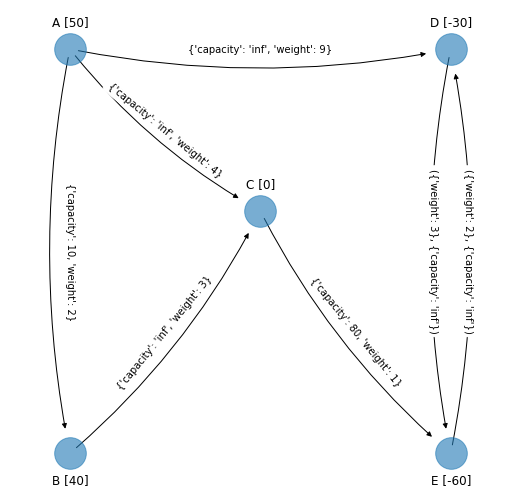

In [82]:
nodes_pos = [[0.18181818181818182, 0.7272727272727273],
             [0.18181818181818182, 0.2727272727272727],
             [0.5454545454545454, 0.2727272727272727],
             [0.5454545454545454, 0.7272727272727273],
             [0.36363636363636365, 0.5454545454545454]]

nodes = ['A', 'B', 'E', 'D', 'C']

nodes_and_pos = dict(zip(nodes, nodes_pos))

G_min_cost_flow = nx.DiGraph()

G_min_cost_flow.add_node('A', demand = 50, node_and_demand="A [50]")
G_min_cost_flow.add_node('B', demand = 40, node_and_demand="B [40]")
G_min_cost_flow.add_node('C', demand = 0, node_and_demand="C [0]")
G_min_cost_flow.add_node('D', demand = -30, node_and_demand="D [-30]")
G_min_cost_flow.add_node('E', demand = -60, node_and_demand="E [-60]")

edge_labels_min_cost_flow = {('A', 'B'): {"weight": 2, "capacity": 10},
                             ('A', 'C'): {"weight": 4, "capacity": "inf"},
                             ('A', 'D'): {"weight": 9, "capacity": "inf"},
                             ('B', 'C'): {"weight": 3, "capacity": "inf"},
                             ('C', 'E'): {"weight": 1, "capacity": 80}
                            }

G_min_cost_flow.add_edges_from(edge_labels_min_cost_flow)
for e in G_min_cost_flow.edges():
    G_min_cost_flow[e[0]][e[1]]["capacity"] = edge_labels_min_cost_flow[e]["capacity"]
    G_min_cost_flow[e[0]][e[1]]["weight"] = edge_labels_min_cost_flow[e]["weight"]

        
plt.figure(figsize=(9, 9))

list_of_edges_not_trouble_to_visualize_min_cost_flow = edge_labels_min_cost_flow.keys()

nx.draw_networkx_edges(G_min_cost_flow, pos=nodes_and_pos, 
                       min_target_margin=25, connectionstyle="arc3, rad = 0.1",
                       edgelist=list_of_edges_not_trouble_to_visualize_min_cost_flow)
nx.draw_networkx_edge_labels(G_min_cost_flow, pos=nodes_and_pos, 
                             font_size=10)

edge_labels_min_cost_flow[('E', 'D')] = {"weight": 2, "capacity": "inf"}

edge_labels_min_cost_flow[('D', 'E')] = {"weight": 3, "capacity": "inf"}


G_min_cost_flow.add_edge('E', 'D')
G_min_cost_flow.add_edge('D', 'E')

n1 = G_min_cost_flow['E']['D']
n2 = G_min_cost_flow['D']['E']

n1["weight"] = 2
n1["capacity"] = "inf"

n2["weight"] = 3
n2["capacity"]= "inf"


stri1 = f'{({"weight": n1["weight"]},{"capacity": n1["capacity"]},)}'
stri2 = f'\n\n\n'
stri3 = f'{({"weight": n2["weight"]}, {"capacity": n2["capacity"]},)}'
string_for_edges_trouble_to_visualize_min_cost_flow = {('D', 'E'): ''.join([stri1, stri2, stri3])}
list_of_edges_trouble_to_visualize_min_cost_flow = [('D', 'E'), ('E', 'D')]
nx.draw_networkx_edges(G_min_cost_flow, pos=nodes_and_pos, 
                       min_target_margin=25, connectionstyle="arc3, rad = 0.1",
                       edgelist=list_of_edges_trouble_to_visualize_min_cost_flow)

nx.draw_networkx_edge_labels(G_min_cost_flow, pos=nodes_and_pos, 
                             edge_labels=string_for_edges_trouble_to_visualize_min_cost_flow,
                             font_size=10)

nodes_pos_modified = {}

y_off = 0.03

nodes_and_pos_modified = nodes_and_pos.copy()

for node in G_min_cost_flow.nodes():
    if node == 'B' or node == 'E':
        nodes_and_pos_modified[node] =  [nodes_and_pos_modified[node][0], 
                                         nodes_and_pos_modified[node][1] - y_off]
    else:
        nodes_and_pos_modified[node] =  [nodes_and_pos_modified[node][0], 
                                         nodes_and_pos_modified[node][1] + y_off]
        
    
node_labels_min_cost_flow = nx.get_node_attributes(G_min_cost_flow, "node_and_demand")

nx.draw_networkx_labels(G_min_cost_flow, pos=nodes_and_pos_modified, 
                        labels=node_labels_min_cost_flow)
nx.draw_networkx_nodes(G_min_cost_flow, pos=nodes_and_pos, 
                       node_size=1000, alpha=0.6)
plt.axis("off")
plt.show()        

En la red anterior el arco $(D, E)$ tiene costo igual a $3$ y el arco $(E, D)$ tiene costo igual a $2$.

El PL es:

$$\displaystyle \min 2 x_{AB} + 4 x_{AC} + 9 x_{AD} + 3 x_{BC} + x_{CE} + 3 x_{DE} + 2x_{ED}$$

$$\text{sujeto a: }$$

$$
\begin{eqnarray}
&x_{AB}&  + &x_{AC}& + &x_{AD}&   &&         &&         &&         &&       &=& 50 \nonumber \\
&-x_{AB}&   &&         &&       + &x_{BC}&   &&         &&         &&       &=& 40 \nonumber \\
&&        - &x_{AC}&   &&       - &x_{BC}& + &x_{CE}&   &&         &&       &=& 0 \nonumber \\
&&          &&       - &x_{AD}&   &&         &&       + &x_{DE}& - &x_{ED}& &=& -30 \nonumber \\
&&          &&         &&         &&       - &x_{CE}& - &x_{DE}& + &x_{ED}& &=& -60 \nonumber
\end{eqnarray}
$$

$$x_{AB} \leq 10, x_{CE} \leq 80$$

$$x_{ij} \geq 0 \forall i,j$$

La primer restricción de igualdad representa el flujo neto para el nodo $A$ y la última el flujo neto para el nodo $E$.

La red solución es:

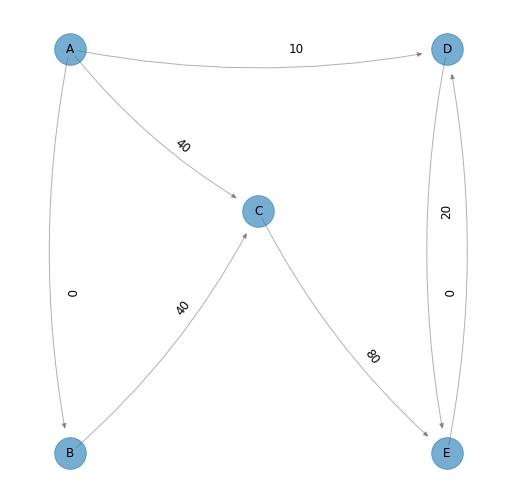

In [83]:
G_min_cost_flow_solution = nx.DiGraph()

G_min_cost_flow_solution.add_nodes_from(nodes)


edge_flows = {('A', 'B'): 0,
              ('A', 'C'): 40,
              ('A', 'D'): 10,
              ('B', 'C'): 40,
              ('C', 'E'): 80,
              ('D', 'E'): 0,            
              ('E', 'D'): 20
              }

G_min_cost_flow_solution.add_edges_from(edge_flows)

plt.figure(figsize=(9, 9))
nx.draw_networkx_edges(G_min_cost_flow_solution, pos=nodes_and_pos, 
                       alpha=0.3,
                       min_target_margin=25, connectionstyle="arc3, rad = 0.1")
nx.draw_networkx_edge_labels(G_min_cost_flow_solution, pos=nodes_and_pos, 
                             edge_labels=edge_flows, label_pos=0.4,
                             font_size=12)
nx.draw_networkx_labels(G_min_cost_flow_solution, pos=nodes_and_pos)
nx.draw_networkx_nodes(G_min_cost_flow_solution, pos=nodes_and_pos, 
                       node_size=1000, alpha=0.6)
plt.axis("off")
plt.show()        

```{margin}

Tal solución se puede verificar utilizando el paquete *Networkx* y ejecutar las instrucciones en el ejemplo de {ref}`flujo con costo mínimo <EJREDFLUJOCOSTOMIN>`, en estas instrucciones se utiliza la función [network_simplex](https://networkx.org/documentation/stable/reference/algorithms/flow.html#network-simplex).

```

En la red anterior el arco $(E, D)$ es de $20$ unidades. La designación del flujo anterior entre todos los nodos incurre en un costo de $490$.

(explicación de la técnica de la cota superior o partir de una solución BF, luego llegar a la siguiente red utilizando el método de símplex de redes)

Supóngase que en alguna iteración $x_{AB}$ se convirtió en la variable básica que será sustituida pues alcanzó su cota superior de $10$. Por tanto el arco $x_{AB}$ se sustituye por $x_{AB} = 10 - y_{BA}$ con $y_{BA}=0$ y por tanto es una variable no básica "nueva". Entonces se sustituye el arco $(A,B)$ por el arco $(B,A)$ el cual tiene un flujo de $y_{BA}$ con capacidad de $10$ y un costo unitario de $-2$. También $b_A$ disminuye de $50$ a $40$ y $b_B$ aumenta de $40$ a $50$:

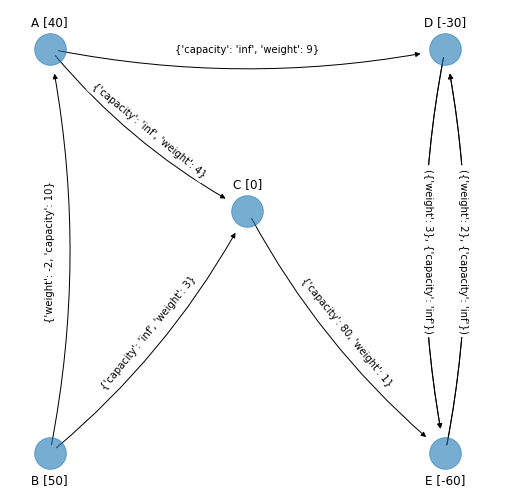

In [84]:
G_simplex = G_min_cost_flow.copy()
G_simplex.remove_edge('A','B')
G_simplex.add_edge('B','A')
G_simplex['B']['A']["weight"] = -2
G_simplex['B']['A']["capacity"] = 10
nx.set_node_attributes(G_simplex, {'A': {"demand": 40,
                                         "node_and_demand": "A [40]"},
                                   'B': {"demand": 50,
                                         "node_and_demand": "B [50]"}
                                   })

list_of_edges_not_trouble_to_visualize_simplex = G_simplex.edges()

plt.figure(figsize=(9, 9))
nx.draw_networkx_edges(G_simplex, pos=nodes_and_pos, 
                       min_target_margin=25, connectionstyle="arc3, rad = 0.1",
                       edgelist=list_of_edges_not_trouble_to_visualize_simplex)
nx.draw_networkx_edge_labels(G_simplex, pos=nodes_and_pos, 
                             font_size=10)

n1 = G_simplex['E']['D']
n2 = G_simplex['D']['E']

n1["weight"] = 2
n1["capacity"] = "inf"

n2["weight"] = 3
n2["capacity"]= "inf"

stri1 = f'{({"weight": n1["weight"]},{"capacity": n1["capacity"]},)}'
stri2 = f'\n\n\n'
stri3 = f'{({"weight": n2["weight"]}, {"capacity": n2["capacity"]},)}'
string_for_edges_trouble_to_visualize_simplex = {('D', 'E'): ''.join([stri1, stri2, stri3])}

list_of_edges_trouble_to_visualize_simplex = [('D', 'E'), ('E', 'D')]

nx.draw_networkx_edges(G_simplex, pos=nodes_and_pos, 
                       min_target_margin=25, connectionstyle="arc3, rad = 0.1",
                       edgelist=list_of_edges_trouble_to_visualize_simplex)

nx.draw_networkx_edge_labels(G_simplex, pos=nodes_and_pos, 
                             edge_labels=string_for_edges_trouble_to_visualize_simplex,
                             font_size=10)

node_labels_simplex = nx.get_node_attributes(G_simplex, "node_and_demand")

nx.draw_networkx_labels(G_simplex, pos=nodes_and_pos_modified, 
                        labels=node_labels_simplex)
nx.draw_networkx_nodes(G_simplex, pos=nodes_and_pos, 
                       node_size=1000, alpha=0.6)
plt.axis("off")
plt.show()


Considérese el siguiente *spanning tree* factible de ésta red:

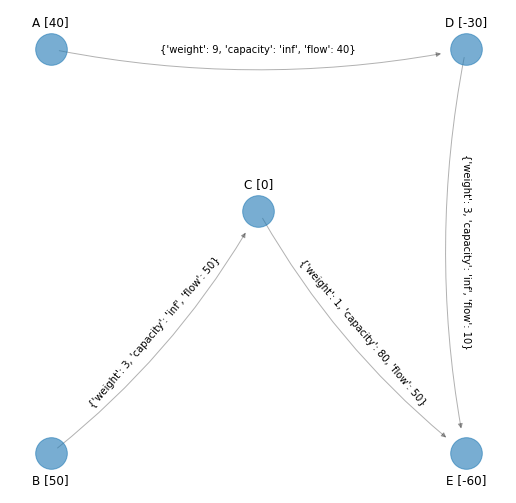

In [85]:
G_simplex_spanning_tree_1 = G_simplex.copy()
G_simplex_spanning_tree_1.remove_edge('B','A')
G_simplex_spanning_tree_1.remove_edge('A', 'C')
G_simplex_spanning_tree_1.remove_edge('E', 'D')

list_edges_spanning_tree_1 = G_simplex_spanning_tree_1.edges()

edge_labels_simplex_spanning_tree_1 = {}

for e in list_edges_spanning_tree_1:
    edge_labels_simplex_spanning_tree_1[e] = copy.deepcopy(edge_labels_min_cost_flow[e])
     
edge_labels_simplex_spanning_tree_1[('A', 'D')]["flow"] = 40
edge_labels_simplex_spanning_tree_1[('B', 'C')]["flow"] = 50
edge_labels_simplex_spanning_tree_1[('C', 'E')]["flow"] = 50
edge_labels_simplex_spanning_tree_1[('D', 'E')]["flow"] = 10

for e in G_simplex_spanning_tree_1.edges():
    G_simplex_spanning_tree_1[e[0]][e[1]]["flow"] = edge_labels_simplex_spanning_tree_1[e]["flow"]
plt.figure(figsize=(9,9))
nx.draw_networkx_edges(G_simplex_spanning_tree_1, pos=nodes_and_pos, 
                       alpha=0.3,
                       min_target_margin=25, connectionstyle="arc3, rad = 0.1")
nx.draw_networkx_edge_labels(G_simplex_spanning_tree_1, pos=nodes_and_pos, 
                             edge_labels=edge_labels_simplex_spanning_tree_1, label_pos=0.5,
                             font_size=10)

node_labels_simplex_spanning_tree_1 = nx.get_node_attributes(G_simplex_spanning_tree_1, 
                                                            "node_and_demand")

nx.draw_networkx_labels(G_simplex_spanning_tree_1, pos=nodes_and_pos_modified, 
                        labels=node_labels_simplex_spanning_tree_1)
nx.draw_networkx_nodes(G_simplex_spanning_tree_1, pos=nodes_and_pos, 
                       node_size=1000, alpha=0.6)
plt.axis("off")
plt.show()    

Los valores anteriores de flujo se pueden obtener resolviendo las siguientes ecuaciones de igualdad que resultan con el cambio $x_{AB} = 10 - y_{BA}$ y considerando arcos no básicos: $y_{AB}, x_{AC}, x_{ED}$ que tienen valor igual a $0$:

$$
\begin{eqnarray}
&-y_{AB}&  + &x_{AC}& + &x_{AD}&   &&         &&         &&         &&       &=& 40 \nonumber \\
&y_{AB}&   &&         &&       + &x_{BC}&   &&         &&         &&       &=& 50 \nonumber \\
&&        - &x_{AC}&   &&       - &x_{BC}& + &x_{CE}&   &&         &&       &=& 0 \nonumber \\
&&          &&       - &x_{AD}&   &&         &&       + &x_{DE}& - &x_{ED}& &=& -30 \nonumber \\
&&          &&         &&         &&       - &x_{CE}& - &x_{DE}& + &x_{ED}& &=& -60 \nonumber
\end{eqnarray}
$$

Variables no básicas: $y_{AB}, x_{AC}, x_{ED}$ que corresponden a árcos no básicos.

In [86]:
print(nx.get_edge_attributes(G_simplex_spanning_tree_1, "flow"))

{('A', 'D'): 40, ('B', 'C'): 50, ('C', 'E'): 50, ('D', 'E'): 10}


### Revisión de cuál variable no básica sustituye a una variable básica

In [87]:
def add_arc_from_spanning_tree(G_full, G_spanning_tree, arc, edge_labels):
    G_cycle = G_spanning_tree.copy()
    G_cycle.add_edge(arc[0], arc[1])
    G_cycle.add_edge(arc[0], arc[1])
    G_cycle[arc[0]][arc[1]]["weight"] = G_full[arc[0]][arc[1]]["weight"]
    G_cycle[arc[0]][arc[1]]["capacity"] = G_full[arc[0]][arc[1]]["capacity"]
    G_cycle[arc[0]][arc[1]]["flow"] = ""
    edge_labels_new = copy.deepcopy(edge_labels)
    edge_labels_new[arc] = {}
    edge_labels_new[arc]["weight"] = G_cycle[arc[0]][arc[1]]["weight"]
    edge_labels_new[arc]["capacity"] = G_cycle[arc[0]][arc[1]]["capacity"]
    edge_labels_new[arc]["flow"] = G_cycle[arc[0]][arc[1]]["flow"]
    return (G_cycle, edge_labels_new)

**Arco $y_{AB}$:**

In [88]:
arc_to_be_added_1 = ('B', 'A')

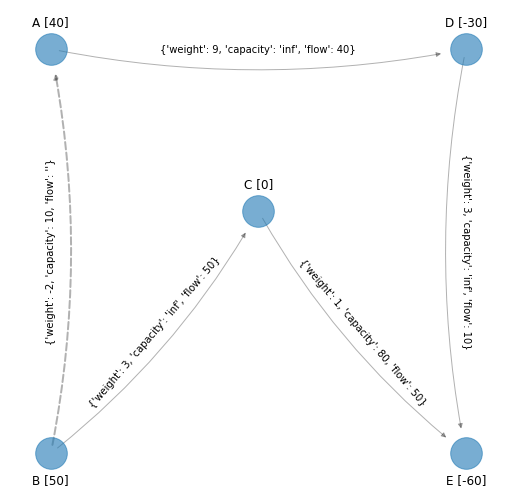

In [89]:
G_simplex_cycle_1, edge_labels_simplex_cycle_1 = add_arc_from_spanning_tree(G_simplex, G_simplex_spanning_tree_1, 
                                                                            arc_to_be_added_1,
                                                                            edge_labels_simplex_spanning_tree_1)
plt.figure(figsize=(9, 9))
nx.draw_networkx_edges(G_simplex_cycle_1, pos=nodes_and_pos, 
                       alpha=0.3,
                       min_target_margin=25, connectionstyle="arc3, rad = 0.1",
                       edgelist=G_simplex_spanning_tree_1.edges())
nx.draw_networkx_edges(G_simplex_cycle_1, pos=nodes_and_pos, 
                       alpha=0.3,
                       min_target_margin=25, connectionstyle="arc3, rad = 0.1",
                       edgelist=[arc_to_be_added_1],
                       width = 2,
                       style="dashed")
nx.draw_networkx_edge_labels(G_simplex_cycle_1, pos=nodes_and_pos, 
                             edge_labels=edge_labels_simplex_cycle_1, label_pos=0.5,
                             font_size=10)
nx.draw_networkx_labels(G_simplex_cycle_1, pos=nodes_and_pos_modified, 
                        labels=node_labels_simplex_spanning_tree_1)
nx.draw_networkx_nodes(G_simplex_cycle_1, pos=nodes_and_pos, 
                       node_size=1000, alpha=0.6)
plt.axis("off")
plt.show() 

Entonces se forma un ciclo no dirigido. La orientación del ciclo se hereda de la dirección del arco añadido, en este caso en sentido de las manecillas del reloj:

In [90]:
cycle_1 = nx.find_cycle(G_simplex_cycle_1, source='B', orientation="ignore")

In [91]:
def fix_orientation(c_d, arc):
    if c_d[arc] == "reverse":
        for k,v in c_d.items():
            if c_d[k] == "forward":
                c_d[k] = "reverse"
            else:
                c_d[k] = "forward"

In [92]:
cycle_1_d = {(t[0], t[1]): t[2] for t in cycle_1}
fix_orientation(cycle_1_d, arc_to_be_added_1)
pprint.pprint(cycle_1_d)

{('A', 'D'): 'forward',
 ('B', 'A'): 'forward',
 ('B', 'C'): 'reverse',
 ('C', 'E'): 'reverse',
 ('D', 'E'): 'forward'}


Se calcula el costo unitario de incrementar el flujo por una unidad. Para los "forward" se suma y para los "reverse" se restan los costos:

In [93]:
edges_and_weights_simplex_cycle_1 = nx.get_edge_attributes(G_simplex_cycle_1, "weight")

In [94]:
pprint.pprint(edges_and_weights_simplex_cycle_1)

{('A', 'D'): 9, ('B', 'A'): -2, ('B', 'C'): 3, ('C', 'E'): 1, ('D', 'E'): 3}


In [95]:
def compute_cost_for_unit_increment(c_d, e_w_d):
    m_number_of_edges_simplex_cycle = len(e_w_d)
    weights_array = np.zeros(m_number_of_edges_simplex_cycle)
    for j,k in enumerate(c_d.keys()):
        if c_d[k] == "forward":
            weights_array[j] = e_w_d[k]
        else:
            weights_array[j] = -1*e_w_d[k]
    return weights_array

In [96]:
print(np.sum(compute_cost_for_unit_increment(cycle_1_d, 
                                             edges_and_weights_simplex_cycle_1))
     )

6.0


**Arco $x_{AC}$:**

In [97]:
arc_to_be_added_2 = ('A', 'C')

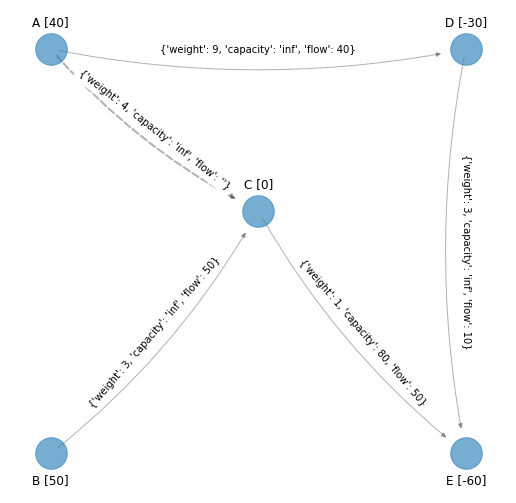

In [98]:
G_simplex_cycle_2, edge_labels_simplex_cycle_2 = add_arc_from_spanning_tree(G_simplex, G_simplex_spanning_tree_1, 
                                                                            arc_to_be_added_2,
                                                                            edge_labels_simplex_spanning_tree_1)
plt.figure(figsize=(9, 9))
nx.draw_networkx_edges(G_simplex_cycle_2, pos=nodes_and_pos, 
                       alpha=0.3,
                       min_target_margin=25, connectionstyle="arc3, rad = 0.1",
                       edgelist=G_simplex_spanning_tree_1.edges())
nx.draw_networkx_edges(G_simplex_cycle_2, pos=nodes_and_pos, 
                       alpha=0.3,
                       min_target_margin=25, connectionstyle="arc3, rad = 0.1",
                       edgelist=[arc_to_be_added_2],
                       width = 2,
                       style="dashed")
nx.draw_networkx_edge_labels(G_simplex_cycle_2, pos=nodes_and_pos, 
                             edge_labels=edge_labels_simplex_cycle_2, label_pos=0.5,
                             font_size=10)
nx.draw_networkx_labels(G_simplex_cycle_2, pos=nodes_and_pos_modified, 
                        labels=node_labels_simplex_spanning_tree_1)
nx.draw_networkx_nodes(G_simplex_cycle_2, pos=nodes_and_pos, 
                       node_size=1000, alpha=0.6)
plt.axis("off")
plt.show() 

In [99]:
cycle_2 = nx.find_cycle(G_simplex_cycle_2, source='B', orientation="ignore")

In [100]:
cycle_2_d = {(t[0], t[1]): t[2] for t in cycle_2}
fix_orientation(cycle_2_d, arc_to_be_added_2)
pprint.pprint(cycle_2_d)

{('A', 'C'): 'forward',
 ('A', 'D'): 'reverse',
 ('C', 'E'): 'forward',
 ('D', 'E'): 'reverse'}


Se calcula el costo unitario de incrementar el flujo por una unidad. Para los "forward" se suma y para los "reverse" se restan los costos:

In [101]:
edges_and_weights_simplex_cycle_2 = nx.get_edge_attributes(G_simplex_cycle_2, "weight")

In [102]:
pprint.pprint(edges_and_weights_simplex_cycle_2)

{('A', 'C'): 4, ('A', 'D'): 9, ('B', 'C'): 3, ('C', 'E'): 1, ('D', 'E'): 3}


In [103]:
print(np.sum(compute_cost_for_unit_increment(cycle_2_d, 
                                             edges_and_weights_simplex_cycle_2))
     )

-7.0


**Arco $x_{ED}$:**

In [104]:
arc_to_be_added_3 = ('E', 'D')

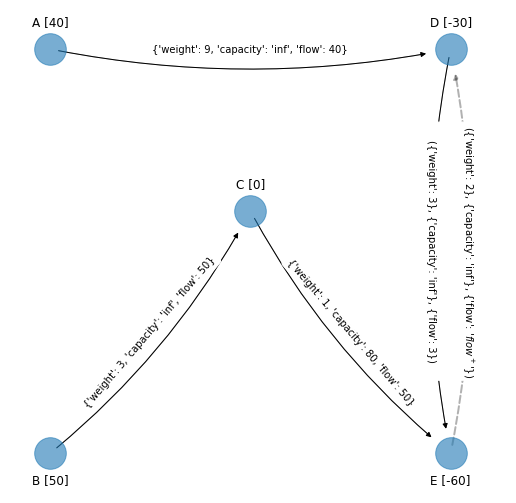

In [105]:
G_simplex_cycle_3, edge_labels_simplex_cycle_3 = add_arc_from_spanning_tree(G_simplex, G_simplex_spanning_tree_1, 
                                                                            arc_to_be_added_3,
                                                                            edge_labels_simplex_spanning_tree_1)
plt.figure(figsize=(9, 9))
nx.draw_networkx_edges(G_simplex_cycle_3, pos=nodes_and_pos, 
                       alpha=0.3,
                       min_target_margin=25, connectionstyle="arc3, rad = 0.1",
                       edgelist=G_simplex_spanning_tree_1.edges())

list_of_edges_not_trouble_to_visualize_cycle_3 = edge_labels_simplex_spanning_tree_1.keys()

nx.draw_networkx_edges(G_simplex_cycle_3, pos=nodes_and_pos, 
                       min_target_margin=25, connectionstyle="arc3, rad = 0.1",
                       edgelist=list_of_edges_not_trouble_to_visualize_cycle_3)

nx.draw_networkx_edge_labels(G_simplex_cycle_3, pos=nodes_and_pos, 
                             edge_labels=edge_labels_simplex_cycle_3, label_pos=0.5,
                             font_size=10)
n1 = G_simplex_cycle_3['E']['D']
n2 = G_simplex_cycle_3['D']['E']

n1["weight"] = 2
n1["capacity"] = "inf"
n1["flow"] = "$flow^+$"
n2["flow"] = 3

stri1 = f'{({"weight": n1["weight"]},{"capacity": n1["capacity"]}, {"flow": n1["flow"]},)}'
stri2 = f'\n\n\n'
stri3 = f'{({"weight": n2["weight"]}, {"capacity": n2["capacity"]},{"flow": n2["flow"]})}'
string_for_edges_trouble_to_visualize = {('D', 'E'): ''.join([stri1, stri2, stri3])}

nx.draw_networkx_edges(G_simplex_cycle_3, pos=nodes_and_pos, 
                       alpha=0.3,
                       min_target_margin=25, connectionstyle="arc3, rad = 0.1",
                       edgelist=[arc_to_be_added_3],
                       width = 2,
                       style="dashed")

nx.draw_networkx_edge_labels(G_simplex_cycle_3, pos=nodes_and_pos, 
                             edge_labels=string_for_edges_trouble_to_visualize,
                             font_size=10)

nx.draw_networkx_labels(G_simplex_cycle_3, pos=nodes_and_pos_modified, 
                        labels=node_labels_simplex_spanning_tree_1)
nx.draw_networkx_nodes(G_simplex_cycle_3, pos=nodes_and_pos, 
                       node_size=1000, alpha=0.6)
plt.axis("off")
plt.show() 

In [106]:
cycle_3 = nx.find_cycle(G_simplex_cycle_3, source='B', orientation="ignore")

In [107]:
cycle_3_d = {(t[0], t[1]): t[2] for t in cycle_3}
fix_orientation(cycle_3_d, arc_to_be_added_3)
pprint.pprint(cycle_3_d)

{('D', 'E'): 'forward', ('E', 'D'): 'forward'}


Se calcula el costo unitario de incrementar el flujo por una unidad. Para los "forward" se suma y para los "reverse" se restan los costos:

In [108]:
edges_and_weights_simplex_cycle_3 = nx.get_edge_attributes(G_simplex_cycle_3, "weight")

In [109]:
pprint.pprint(edges_and_weights_simplex_cycle_3)

{('A', 'D'): 9, ('B', 'C'): 3, ('C', 'E'): 1, ('D', 'E'): 3, ('E', 'D'): 2}


In [110]:
print(np.sum(compute_cost_for_unit_increment(cycle_3_d, 
                                             edges_and_weights_simplex_cycle_3))
     )

5.0


En resúmen:

|Arco | Costo por incrementar una unidad del arco|
|:---:|:---:|
|(B,A)|6|
|(A,C)|-7|
|(E,D)|5|

Entonces el arco no básico que tiene la tasa más alta de mejoramiento de $f_o$ es $(A,C)$.

```{admonition} Comentario

Si no hay arcos no básicos que mejoren $f_o$ entonces la solución actual es óptima.

```

### Revisión de cuál arco básico es sustituido

Se determina incrementando el flujo de la red lo más posible hasta que uno de los arcos básicos llege a su cota inferior o superior. Denotemos al incremento como la cantidad $\text{flow}^+$ y para los arcos que son "forward" se suma tal cantidad al flujo actual y para los que son "reverse" se resta:

In [111]:
def edge_label_change_for_basic_arc_subs(c_d, edge_labels_reference, arc_to_be_added):
    edge_labels_modified = {}
    edge_labels_modified = copy.deepcopy(edge_labels_reference)
    for e in edge_labels_modified.keys():
        if e in c_d.keys():
            if e != arc_to_be_added:
                if c_d[e] == "forward":
                    edge_labels_modified[e]["flow"] = "".join([str(edge_labels_modified[e]["flow"]),
                                                               "+ $flow^+$"])
                    edge_labels_modified[e]["bool"] = "+" 
                else:
                    edge_labels_modified[e]["flow"] = "".join([str(edge_labels_modified[e]["flow"]),
                                                               "- $flow^+$"])
                    edge_labels_modified[e]["bool"] = "-"
            else:
                edge_labels_modified[e]["flow"] = "".join([str(edge_labels_modified[e]["flow"]),
                                                           "$flow^+$"]) 
        else:
            edge_labels_modified[e]["bool"] = 0 
    return edge_labels_modified

In [112]:
edge_labels_simplex_cycle_2_modified = edge_label_change_for_basic_arc_subs(cycle_2_d, 
                                                                            edge_labels_simplex_cycle_2, 
                                                                            arc_to_be_added_2)

In [113]:
pprint.pprint(edge_labels_simplex_cycle_2_modified)

{('A', 'C'): {'capacity': 'inf', 'flow': '$flow^+$', 'weight': 4},
 ('A', 'D'): {'bool': '-',
              'capacity': 'inf',
              'flow': '40- $flow^+$',
              'weight': 9},
 ('B', 'C'): {'bool': 0, 'capacity': 'inf', 'flow': 50, 'weight': 3},
 ('C', 'E'): {'bool': '+', 'capacity': 80, 'flow': '50+ $flow^+$', 'weight': 1},
 ('D', 'E'): {'bool': '-',
              'capacity': 'inf',
              'flow': '10- $flow^+$',
              'weight': 3}}


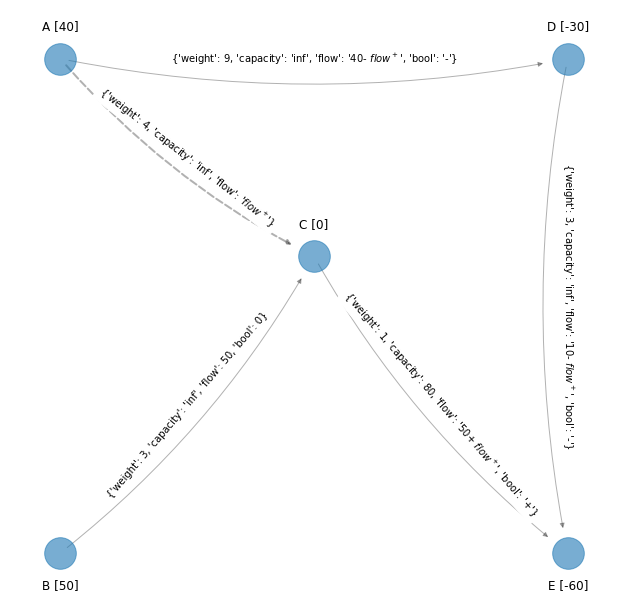

In [114]:
plt.figure(figsize=(11, 11))
nx.draw_networkx_edges(G_simplex_cycle_2, pos=nodes_and_pos, 
                       alpha=0.3,
                       min_target_margin=25, connectionstyle="arc3, rad = 0.1",
                       edgelist=G_simplex_spanning_tree_1.edges())
nx.draw_networkx_edges(G_simplex_cycle_2, pos=nodes_and_pos, 
                       alpha=0.3,
                       min_target_margin=25, connectionstyle="arc3, rad = 0.1",
                       edgelist=[arc_to_be_added_2],
                       width = 2,
                       style="dashed")
nx.draw_networkx_edge_labels(G_simplex_cycle_2, pos=nodes_and_pos, 
                             edge_labels=edge_labels_simplex_cycle_2_modified, label_pos=0.5,
                             font_size=10)
nx.draw_networkx_labels(G_simplex_cycle_2, pos=nodes_and_pos_modified, 
                        labels=node_labels_simplex_spanning_tree_1)
nx.draw_networkx_nodes(G_simplex_cycle_2, pos=nodes_and_pos, 
                       node_size=1000, alpha=0.6)
plt.axis("off")
plt.show() 

Como se debe cumplir la no negatividad y la cota superior, para los arcos en los que se aumenta y tienen cota superior se tiene

$$x_{CE} = 50 + \text{flow}^+ \leq 80$$

y para los arcos en los que se disminuye:

$$\begin{eqnarray}
x_{AD} = 40 - \text{flow}^+ &\geq& 0 \nonumber \\
x_{DE} = 10 - \text{flow}^+ &\geq& 0
\end{eqnarray}
$$

Por lo que:

$$\begin{eqnarray}
\text{flow}^+ &\leq& 30 \quad \text{que se obtuvo del arco } x_{CE} \nonumber \\
\text{flow}^+ &\leq& 40 \quad \text{que se obtuvo del arco } x_{AD} \nonumber \\
\text{flow}^+ &\leq& 10 \quad \text{que se obtuvo del arco } x_{DE} \nonumber
\end{eqnarray}
$$

El mínimo es $10$, entonces $\text{flow}^+ = 10$ y el arco básico que será sustituido es $(D,E)$.

El nuevo *spanning tree* factible es:

In [115]:
flow_plus = 10

In [116]:
arc_to_remove = ('D', 'E')
arc_to_add = arc_to_be_added_2

In [117]:
print(arc_to_add)

('A', 'C')


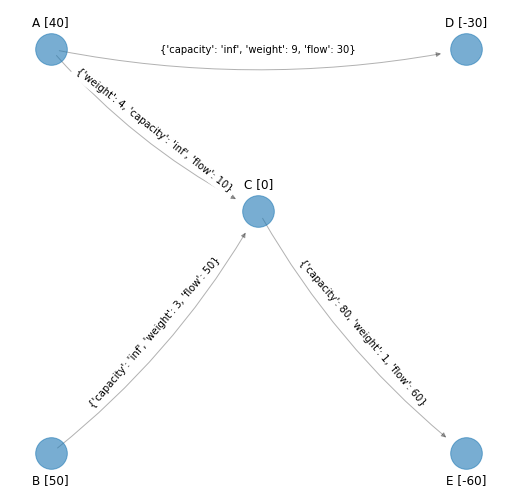

In [118]:
G_simplex_spanning_tree_2 = G_simplex_spanning_tree_1.copy()
G_simplex_spanning_tree_2.remove_edge(arc_to_remove[0],arc_to_remove[1])
G_simplex_spanning_tree_2.add_edge(arc_to_add[0], arc_to_add[1])

list_edges_spanning_tree_2 = G_simplex_spanning_tree_2.edges()

edge_labels_simplex_spanning_tree_2 = {}

for e in list_edges_spanning_tree_2:
    if e != arc_to_add:
        edge_labels_simplex_spanning_tree_2[e] = copy.deepcopy(G_simplex_spanning_tree_1[e[0]][e[1]])
        if edge_labels_simplex_cycle_2_modified[e]["bool"] == "+":
            edge_labels_simplex_spanning_tree_2[e]["flow"] = edge_labels_simplex_spanning_tree_2[e]["flow"] + flow_plus
        else:
            if edge_labels_simplex_cycle_2_modified[e]["bool"] == "-":
                edge_labels_simplex_spanning_tree_2[e]["flow"] = edge_labels_simplex_spanning_tree_2[e]["flow"] - flow_plus
            else:
                edge_labels_simplex_spanning_tree_2[e]["flow"] = edge_labels_simplex_spanning_tree_2[e]["flow"]

    if e == arc_to_add:
        edge_labels_simplex_spanning_tree_2[e] = {}
        edge_labels_simplex_spanning_tree_2[e]["weight"] = G_simplex[arc_to_add[0]][arc_to_add[1]]["weight"]
        edge_labels_simplex_spanning_tree_2[e]["capacity"] = G_simplex[arc_to_add[0]][arc_to_add[1]]["capacity"]
        edge_labels_simplex_spanning_tree_2[e]["flow"] = flow_plus 
        

for e in G_simplex_spanning_tree_2.edges():
    G_simplex_spanning_tree_2[e[0]][e[1]]["flow"] = edge_labels_simplex_spanning_tree_2[e]["flow"]
    if e==arc_to_add:
        G_simplex_spanning_tree_2[e[0]][e[1]]["weight"] = edge_labels_simplex_spanning_tree_2[e]["weight"]
        G_simplex_spanning_tree_2[e[0]][e[1]]["capacity"] = edge_labels_simplex_spanning_tree_2[e]["capacity"]
        
plt.figure(figsize=(9,9))
nx.draw_networkx_edges(G_simplex_spanning_tree_2, pos=nodes_and_pos, 
                       alpha=0.3,
                       min_target_margin=25, connectionstyle="arc3, rad = 0.1")
nx.draw_networkx_edge_labels(G_simplex_spanning_tree_2, pos=nodes_and_pos, 
                             edge_labels=edge_labels_simplex_spanning_tree_2, label_pos=0.5,
                             font_size=10)

node_labels_simplex_spanning_tree_2 = nx.get_node_attributes(G_simplex_spanning_tree_2, 
                                                            "node_and_demand")

nx.draw_networkx_labels(G_simplex_spanning_tree_2, pos=nodes_and_pos_modified, 
                        labels=node_labels_simplex_spanning_tree_2)
nx.draw_networkx_nodes(G_simplex_spanning_tree_2, pos=nodes_and_pos, 
                       node_size=1000, alpha=0.6)
plt.axis("off")
plt.show()    

### Iteración siguiente

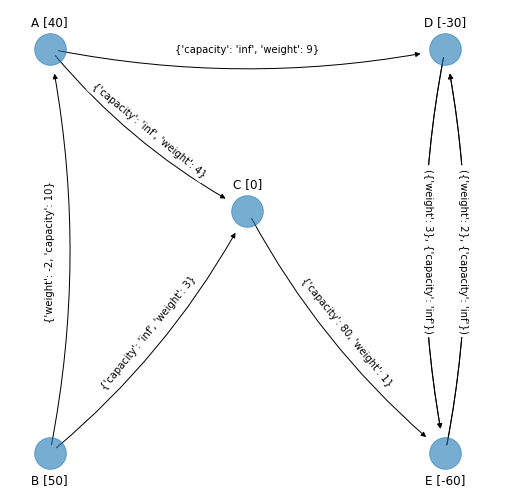

In [119]:
plt.figure(figsize=(9, 9))
nx.draw_networkx_edges(G_simplex, pos=nodes_and_pos, 
                       min_target_margin=25, connectionstyle="arc3, rad = 0.1",
                       edgelist=list_of_edges_not_trouble_to_visualize_simplex)
nx.draw_networkx_edge_labels(G_simplex, pos=nodes_and_pos, 
                             font_size=10)
list_of_edges_trouble_to_visualize_simplex = [('D', 'E'), ('E', 'D')]

nx.draw_networkx_edges(G_simplex, pos=nodes_and_pos, 
                       min_target_margin=25, connectionstyle="arc3, rad = 0.1",
                       edgelist=list_of_edges_trouble_to_visualize_simplex)

nx.draw_networkx_edge_labels(G_simplex, pos=nodes_and_pos, 
                             edge_labels=string_for_edges_trouble_to_visualize_simplex,
                             font_size=10)

node_labels_simplex = nx.get_node_attributes(G_simplex, "node_and_demand")

nx.draw_networkx_labels(G_simplex, pos=nodes_and_pos_modified, 
                        labels=node_labels_simplex)
nx.draw_networkx_nodes(G_simplex, pos=nodes_and_pos, 
                       node_size=1000, alpha=0.6)
plt.axis("off")
plt.show()

Identificamos los arcos no básicos que son los que no están en el *spanning tree factible* que se obtuvo al final de la iteración anterior. En el margen se muestra la red, entonces los arcos no básicos son $(B, A), (D, E), (E,D)$.

### Revisión de cuál variable no básica sustituye a una variable básica

**Arco $(B, A)$**:

In [120]:
arc_to_be_added_1 = ('B', 'A')

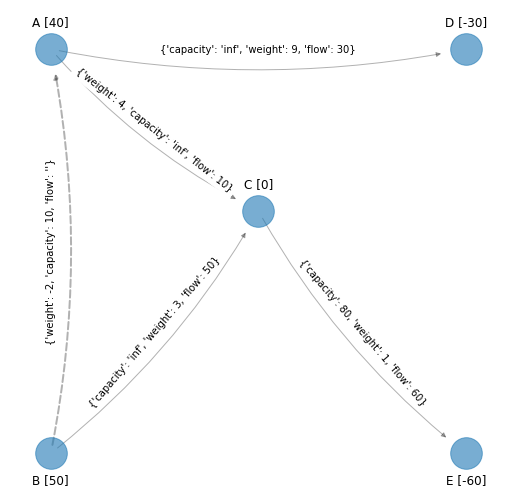

In [121]:
G_simplex_cycle_1, edge_labels_simplex_cycle_1 = add_arc_from_spanning_tree(G_simplex, G_simplex_spanning_tree_2, 
                                                                            arc_to_be_added_1,
                                                                            edge_labels_simplex_spanning_tree_2)
plt.figure(figsize=(9, 9))
nx.draw_networkx_edges(G_simplex_cycle_1, pos=nodes_and_pos, 
                       alpha=0.3,
                       min_target_margin=25, connectionstyle="arc3, rad = 0.1",
                       edgelist=G_simplex_spanning_tree_2.edges())
nx.draw_networkx_edges(G_simplex_cycle_1, pos=nodes_and_pos, 
                       alpha=0.3,
                       min_target_margin=25, connectionstyle="arc3, rad = 0.1",
                       edgelist=[arc_to_be_added_1],
                       width = 2,
                       style="dashed")
nx.draw_networkx_edge_labels(G_simplex_cycle_1, pos=nodes_and_pos, 
                             edge_labels=edge_labels_simplex_cycle_1, label_pos=0.5,
                             font_size=10)
nx.draw_networkx_labels(G_simplex_cycle_1, pos=nodes_and_pos_modified, 
                        labels=node_labels_simplex_spanning_tree_2)
nx.draw_networkx_nodes(G_simplex_cycle_1, pos=nodes_and_pos, 
                       node_size=1000, alpha=0.6)
plt.axis("off")
plt.show() 

Entonces se forma un ciclo no dirigido. Se calcula el costo unitario de incrementar el flujo por una unidad. Para los arcos "forward" se suma y para los "reverse" se restan los costos:

In [122]:
cycle_1 = nx.find_cycle(G_simplex_cycle_1, source='B', orientation="ignore")
cycle_1_d = {(t[0], t[1]): t[2] for t in cycle_1}
fix_orientation(cycle_1_d, arc_to_be_added_1)

edges_and_weights_simplex_cycle_1 = nx.get_edge_attributes(G_simplex_cycle_1, "weight")

print(np.sum(compute_cost_for_unit_increment(cycle_1_d, 
                                             edges_and_weights_simplex_cycle_1))
     )

-1.0


**Arco $(D, E)$**:

In [123]:
arc_to_be_added_2 = ('D', 'E')

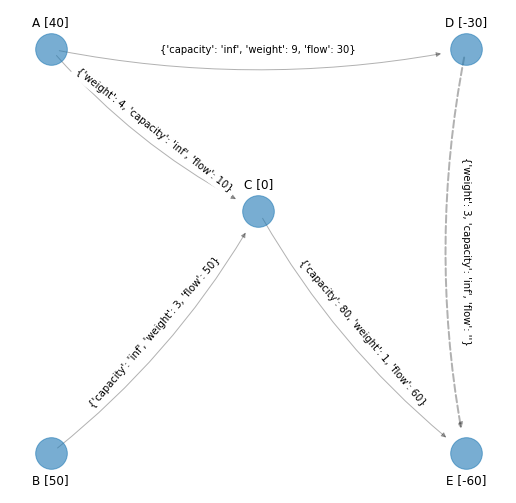

In [124]:
G_simplex_cycle_2, edge_labels_simplex_cycle_2 = add_arc_from_spanning_tree(G_simplex, G_simplex_spanning_tree_2, 
                                                                            arc_to_be_added_2,
                                                                            edge_labels_simplex_spanning_tree_2)
plt.figure(figsize=(9, 9))
nx.draw_networkx_edges(G_simplex_cycle_2, pos=nodes_and_pos, 
                       alpha=0.3,
                       min_target_margin=25, connectionstyle="arc3, rad = 0.1",
                       edgelist=G_simplex_spanning_tree_2.edges())
nx.draw_networkx_edges(G_simplex_cycle_2, pos=nodes_and_pos, 
                       alpha=0.3,
                       min_target_margin=25, connectionstyle="arc3, rad = 0.1",
                       edgelist=[arc_to_be_added_2],
                       width = 2,
                       style="dashed")
nx.draw_networkx_edge_labels(G_simplex_cycle_2, pos=nodes_and_pos, 
                             edge_labels=edge_labels_simplex_cycle_2, label_pos=0.5,
                             font_size=10)
nx.draw_networkx_labels(G_simplex_cycle_2, pos=nodes_and_pos_modified, 
                        labels=node_labels_simplex_spanning_tree_2)
nx.draw_networkx_nodes(G_simplex_cycle_2, pos=nodes_and_pos, 
                       node_size=1000, alpha=0.6)
plt.axis("off")
plt.show() 

Entonces se forma un ciclo no dirigido. Se calcula el costo unitario de incrementar el flujo por una unidad. Para los arcos "forward" se suma y para los "reverse" se restan los costos:

In [125]:
cycle_2 = nx.find_cycle(G_simplex_cycle_2, source='B', orientation="ignore")
cycle_2_d = {(t[0], t[1]): t[2] for t in cycle_2}
fix_orientation(cycle_2_d, arc_to_be_added_2)

edges_and_weights_simplex_cycle_2 = nx.get_edge_attributes(G_simplex_cycle_2, "weight")

print(np.sum(compute_cost_for_unit_increment(cycle_2_d, 
                                             edges_and_weights_simplex_cycle_2))
     )

7.0


**Arco $(E, D)$**:

In [126]:
arc_to_be_added_3 = ('E', 'D')

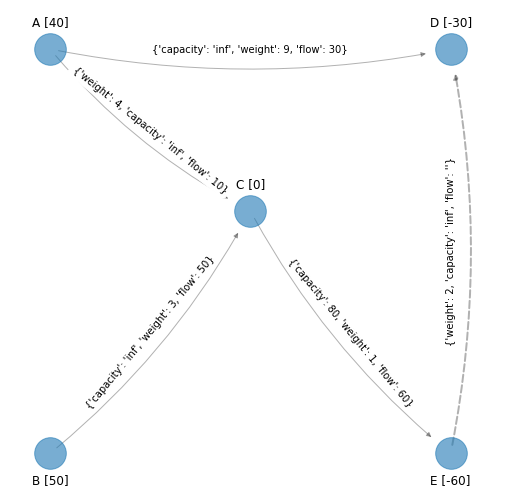

In [127]:
G_simplex_cycle_3, edge_labels_simplex_cycle_3 = add_arc_from_spanning_tree(G_simplex, G_simplex_spanning_tree_2, 
                                                                            arc_to_be_added_3,
                                                                            edge_labels_simplex_spanning_tree_2)
plt.figure(figsize=(9, 9))
nx.draw_networkx_edges(G_simplex_cycle_3, pos=nodes_and_pos, 
                       alpha=0.3,
                       min_target_margin=25, connectionstyle="arc3, rad = 0.1",
                       edgelist=G_simplex_spanning_tree_2.edges())
nx.draw_networkx_edges(G_simplex_cycle_3, pos=nodes_and_pos, 
                       alpha=0.3,
                       min_target_margin=25, connectionstyle="arc3, rad = 0.1",
                       edgelist=[arc_to_be_added_3],
                       width = 2,
                       style="dashed")
nx.draw_networkx_edge_labels(G_simplex_cycle_3, pos=nodes_and_pos, 
                             edge_labels=edge_labels_simplex_cycle_3, label_pos=0.5,
                             font_size=10)
nx.draw_networkx_labels(G_simplex_cycle_3, pos=nodes_and_pos_modified, 
                        labels=node_labels_simplex_spanning_tree_2)
nx.draw_networkx_nodes(G_simplex_cycle_3, pos=nodes_and_pos, 
                       node_size=1000, alpha=0.6)
plt.axis("off")
plt.show() 

Entonces se forma un ciclo no dirigido. Se calcula el costo unitario de incrementar el flujo por una unidad. Para los arcos "forward" se suma y para los "reverse" se restan los costos:

In [128]:
cycle_3 = nx.find_cycle(G_simplex_cycle_3, source='B', orientation="ignore")
cycle_3_d = {(t[0], t[1]): t[2] for t in cycle_3}
fix_orientation(cycle_3_d, arc_to_be_added_3)

edges_and_weights_simplex_cycle_3 = nx.get_edge_attributes(G_simplex_cycle_3, "weight")

print(np.sum(compute_cost_for_unit_increment(cycle_3_d, 
                                             edges_and_weights_simplex_cycle_3))
     )

-2.0


En resúmen:

|Arco | Costo por incrementar una unidad del arco|
|:---:|:---:|
|(B,A)|-1|
|(D,E)|7|
|(E,D)|-2|

Entonces el arco no básico que tiene la tasa más alta de mejoramiento de $f_o$ es $(E,D)$.

### Revisión de cuál arco básico es sustituido

Se denota como la cantidad $flow^+$ y para los arcos que son "forward" se suma tal cantidad al flujo actual y para los que son "reverse" se resta:

In [129]:
edge_labels_simplex_cycle_3_modified = edge_label_change_for_basic_arc_subs(cycle_3_d, 
                                                                            edge_labels_simplex_cycle_3, 
                                                                            arc_to_be_added_3)


In [130]:
pprint.pprint(edge_labels_simplex_cycle_3_modified)

{('A', 'C'): {'bool': '+',
              'capacity': 'inf',
              'flow': '10+ $flow^+$',
              'weight': 4},
 ('A', 'D'): {'bool': '-',
              'capacity': 'inf',
              'flow': '30- $flow^+$',
              'weight': 9},
 ('B', 'C'): {'bool': 0, 'capacity': 'inf', 'flow': 50, 'weight': 3},
 ('C', 'E'): {'bool': '+', 'capacity': 80, 'flow': '60+ $flow^+$', 'weight': 1},
 ('E', 'D'): {'capacity': 'inf', 'flow': '$flow^+$', 'weight': 2}}


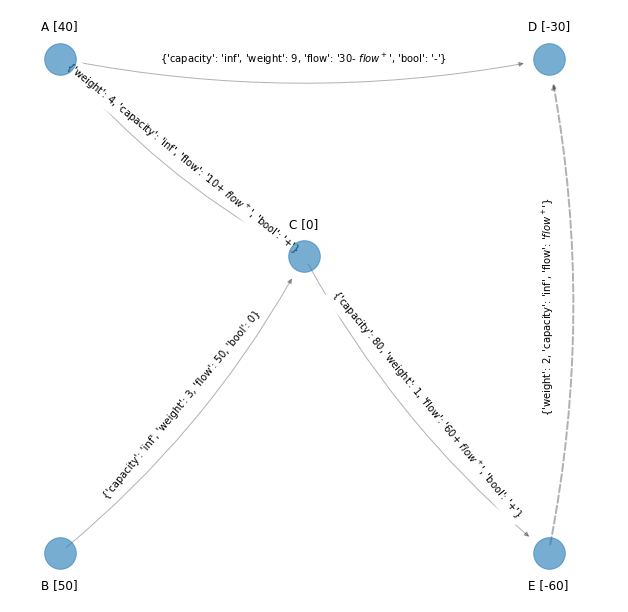

In [131]:
plt.figure(figsize=(11, 11))
nx.draw_networkx_edges(G_simplex_cycle_3, pos=nodes_and_pos, 
                       alpha=0.3,
                       min_target_margin=25, connectionstyle="arc3, rad = 0.1",
                       edgelist=G_simplex_spanning_tree_2.edges())
nx.draw_networkx_edges(G_simplex_cycle_3, pos=nodes_and_pos, 
                       alpha=0.3,
                       min_target_margin=25, connectionstyle="arc3, rad = 0.1",
                       edgelist=[arc_to_be_added_3],
                       width = 2,
                       style="dashed")
nx.draw_networkx_edge_labels(G_simplex_cycle_3, pos=nodes_and_pos, 
                             edge_labels=edge_labels_simplex_cycle_3_modified, label_pos=0.5,
                             font_size=10)
nx.draw_networkx_labels(G_simplex_cycle_3, pos=nodes_and_pos_modified, 
                        labels=node_labels_simplex_spanning_tree_2)
nx.draw_networkx_nodes(G_simplex_cycle_3, pos=nodes_and_pos, 
                       node_size=1000, alpha=0.6)
plt.axis("off")
plt.show() 

Como se debe cumplir la no negatividad y la cota superior, para los arcos en los que se aumenta y tienen cota superior se tiene:

$$
x_{CE} = 60 + \text{flow}^+ \leq 80
$$

y para los arcos en los que se disminuye:

$$
x_{AD} = 30 - \text{flow}^+ \geq 0
$$

Por lo que:

$$
\begin{eqnarray}
\text{flow}^+ &\leq& 20 \quad \text{que se obtuvo del arco } x_{CE} \nonumber \\
\text{flow}^+ &\leq& 30 \quad \text{que se obtuvo del arco } x_{AD} \nonumber \\
\end{eqnarray}
$$

El mínimo es 20, entonces $\text{flow}^+=20$ y el arco básico que será sustituido es $(C,E)$.

### Técnica de la cota superior

Al modificar el flujo con $\text{flow}^+=20$ se tiene que el arco $(C,E)$ tiene un flujo igual a $80$ con lo que llegó a su capacidad máxima. Entonces se intercambia el arco $(C, E)$ por el arco $(E, C)$ con costo unitario igual al negativo de $(C, E)$, misma capacidad y con flujo igual igual $0$. Surge una nueva variable no básica $y_{CE} = 0$ y $x_{CE} = 80 - y_{CE}$. $b_E$ se le aumenta $80$ y $b_C$ se le resta $80$:


In [133]:
new_demand_E = G_simplex['C']['E']["capacity"] + nx.get_node_attributes(G_simplex, "demand")['E']

In [144]:
print(new_demand_E)

20


In [135]:
new_demand_C = nx.get_node_attributes(G_simplex, "demand")['C']- G_simplex['C']['E']["capacity"] 

In [145]:
print(new_demand_C)

-80


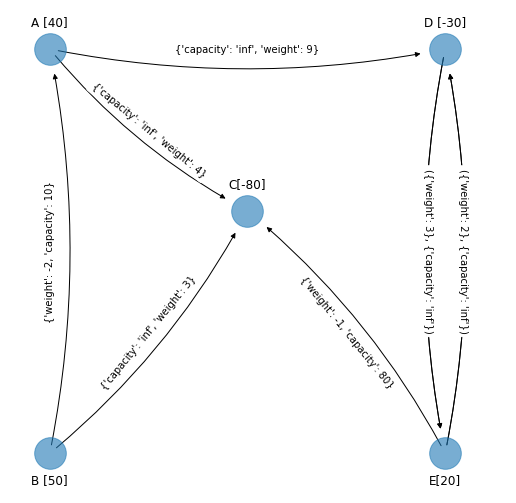

In [146]:
G_simplex2 = G_simplex.copy()
G_simplex2.remove_edge('C','E')
G_simplex2.add_edge('E','C')
G_simplex2['E']['C']["weight"] = -G_simplex['C']['E']["weight"]
G_simplex2['E']['C']["capacity"] = G_simplex['C']['E']["capacity"]

node_and_demand_E = "".join(['E', '[', str(new_demand_E),']'])
node_and_demand_C = "".join(['C', '[', str(new_demand_C),']'])

nx.set_node_attributes(G_simplex2, {'E': {"demand": new_demand_E,
                                         "node_and_demand": node_and_demand_E},
                                   'C': {"demand": new_demand_C,
                                         "node_and_demand": node_and_demand_C}
                                   })

list_of_edges_not_trouble_to_visualize_simplex2 = G_simplex2.edges()

plt.figure(figsize=(9, 9))
nx.draw_networkx_edges(G_simplex2, pos=nodes_and_pos, 
                       min_target_margin=25, connectionstyle="arc3, rad = 0.1",
                       edgelist=list_of_edges_not_trouble_to_visualize_simplex2)
nx.draw_networkx_edge_labels(G_simplex2, pos=nodes_and_pos, 
                             font_size=10)


list_of_edges_trouble_to_visualize_simplex2 = [('D', 'E'), ('E', 'D')]

nx.draw_networkx_edges(G_simplex2, pos=nodes_and_pos, 
                       min_target_margin=25, connectionstyle="arc3, rad = 0.1",
                       edgelist=list_of_edges_trouble_to_visualize_simplex2)

nx.draw_networkx_edge_labels(G_simplex2, pos=nodes_and_pos, 
                             edge_labels=string_for_edges_trouble_to_visualize_simplex,
                             font_size=10)

node_labels_simplex2 = nx.get_node_attributes(G_simplex2, "node_and_demand")

nx.draw_networkx_labels(G_simplex2, pos=nodes_and_pos_modified, 
                        labels=node_labels_simplex2)
nx.draw_networkx_nodes(G_simplex2, pos=nodes_and_pos, 
                       node_size=1000, alpha=0.6)
plt.axis("off")
plt.show()

El nuevo *spanning tree* factible es:

In [147]:
flow_plus = 20

In [148]:
arc_to_remove = ('C', 'E')
arc_to_add = arc_to_be_added_3

In [149]:
print(arc_to_add)

('E', 'D')


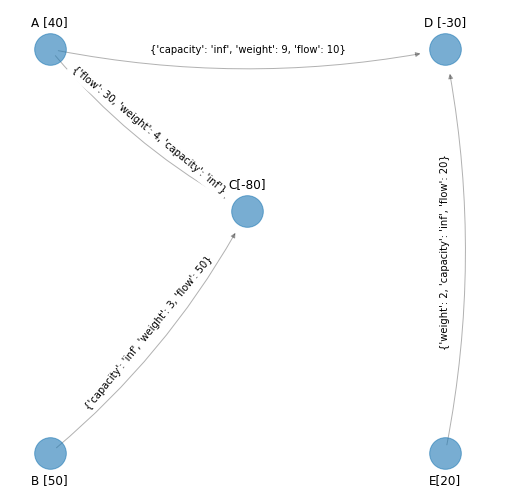

In [150]:
G_simplex_spanning_tree_3 = G_simplex_spanning_tree_2.copy()
G_simplex_spanning_tree_3.remove_edge(arc_to_remove[0],arc_to_remove[1])
G_simplex_spanning_tree_3.add_edge(arc_to_add[0], arc_to_add[1])

#update demands after upper bound technique
nx.set_node_attributes(G_simplex_spanning_tree_3, {'C': {"demand": new_demand_C,
                                                         "node_and_demand": node_and_demand_C}})
nx.set_node_attributes(G_simplex_spanning_tree_3, {'E': {"demand": new_demand_E,
                                                         "node_and_demand": node_and_demand_E}})

list_edges_spanning_tree_3 = G_simplex_spanning_tree_3.edges()

edge_labels_simplex_spanning_tree_3 = {}

for e in list_edges_spanning_tree_3:
    if e != arc_to_add:
        edge_labels_simplex_spanning_tree_3[e] = copy.deepcopy(G_simplex_spanning_tree_2[e[0]][e[1]])
        if edge_labels_simplex_cycle_3_modified[e]["bool"] == "+":
            edge_labels_simplex_spanning_tree_3[e]["flow"] = edge_labels_simplex_spanning_tree_3[e]["flow"] + flow_plus
        else:
            if edge_labels_simplex_cycle_3_modified[e]["bool"] == "-":
                edge_labels_simplex_spanning_tree_3[e]["flow"] = edge_labels_simplex_spanning_tree_3[e]["flow"] - flow_plus
            else:
                edge_labels_simplex_spanning_tree_3[e]["flow"] = edge_labels_simplex_spanning_tree_3[e]["flow"]

    if e == arc_to_add:
        edge_labels_simplex_spanning_tree_3[e] = {}
        edge_labels_simplex_spanning_tree_3[e]["weight"] = G_simplex[arc_to_add[0]][arc_to_add[1]]["weight"]
        edge_labels_simplex_spanning_tree_3[e]["capacity"] = G_simplex[arc_to_add[0]][arc_to_add[1]]["capacity"]
        edge_labels_simplex_spanning_tree_3[e]["flow"] = flow_plus 
        

for e in G_simplex_spanning_tree_3.edges():
    G_simplex_spanning_tree_3[e[0]][e[1]]["flow"] = edge_labels_simplex_spanning_tree_3[e]["flow"]
    if e==arc_to_add:
        G_simplex_spanning_tree_3[e[0]][e[1]]["weight"] = edge_labels_simplex_spanning_tree_3[e]["weight"]
        G_simplex_spanning_tree_3[e[0]][e[1]]["capacity"] = edge_labels_simplex_spanning_tree_3[e]["capacity"]
        
plt.figure(figsize=(9,9))
nx.draw_networkx_edges(G_simplex_spanning_tree_3, pos=nodes_and_pos, 
                       alpha=0.3,
                       min_target_margin=25, connectionstyle="arc3, rad = 0.1")
nx.draw_networkx_edge_labels(G_simplex_spanning_tree_3, pos=nodes_and_pos, 
                             edge_labels=edge_labels_simplex_spanning_tree_3, label_pos=0.5,
                             font_size=10)

node_labels_simplex_spanning_tree_3 = nx.get_node_attributes(G_simplex_spanning_tree_3, 
                                                            "node_and_demand")

nx.draw_networkx_labels(G_simplex_spanning_tree_3, pos=nodes_and_pos_modified, 
                        labels=node_labels_simplex_spanning_tree_3)
nx.draw_networkx_nodes(G_simplex_spanning_tree_3, pos=nodes_and_pos, 
                       node_size=1000, alpha=0.6)
plt.axis("off")
plt.show()    

```{admonition} Ejercicios
:class: tip

1.Resuelve los ejercicios y preguntas de la nota.
```


**Referencias:**

1. F. Hillier, G. Lieberman, Introduction to Operations Research, Mc Graw Hill, 2014.

2. R. K. Ahuja, T. L. Magnanti, J. B. Orlin, Network Flows, Theory, Algorithms and Applications, Prentice Hall, 1993.

3. M. S. Bazaraa, J. J. Jarvis, H. D. Sherali, Linear Programming and Network Flows, Wiley, 2010.

4. J. Nocedal, S. J. Wright, Numerical Optimization, Springer, 2006.



